In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from leela_interp.core.effect_study import *
from leela_interp.core.alternative_moves import *

In [3]:
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device("cpu")
model = Lc0sight("lc0.onnx", device=device)

Using device: cpu


In [6]:
study = EffectStudy(model, puzzlename="doublelow", n_examples=0, alt_puzzles=True)

Puzzles: 9398
Puzzles with 3 moves in principal variation: 9398
Puzzles with different start and end squares in principal variation: 9398
Puzzles that are mate in 2: 9398


Checking double games:   0%|          | 0/9398 [00:00<?, ?it/s]

Checking double games:   0%|          | 29/9398 [00:12<58:41,  2.66it/s]  

In [4]:
study = EffectStudy(model, puzzlename="double", n_examples=0, alt_puzzles=True)

Puzzles: 11813
Puzzles with 3 moves in principal variation: 11813
Puzzles with full PV probabilities between 0.4 and 0.6: 11813
Puzzles that are mate in 2: 11813
Puzzles with different start and end squares in principal variation: 11813


Checking double games:   0%|          | 0/11813 [00:00<?, ?it/s]

Checking double games: 100%|██████████| 11813/11813 [35:31<00:00,  5.54it/s]

Puzzles that are double games: 597
Puzzles with 4 distinct moves: 309



/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:145: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.all_effects = -torch.load(
/home/dcruz/Pivota

# Tree search

In [67]:
puzzle = study.alt_puzzles.iloc[1]
board = LeelaBoard.from_puzzle(puzzle)

In [70]:
correct_moves = puzzle.Moves.split()
total_moveset = {puzzle.Moves.split()[0]: {'prob': 1.0} | get_top_moves(model, board, limit=3, min_prob=0.3)}

1 {'d3h7': {'prob': 0.8853151202201843}}
2 {'h7h6': {'prob': 0.9883930087089539, 'd3h7': {'prob': 0.8853151202201843}}}
1 {'c4d3': {'prob': 0.8476101756095886}}
2 {'c5d3': {'prob': 0.9883109927177429, 'c4d3': {'prob': 0.8476101756095886}}}
3 {'g6g7': {'prob': 0.5534352660179138, 'h7h6': {'prob': 0.9883930087089539, 'd3h7': {'prob': 0.8853151202201843}}}, 'g6f6': {'prob': 0.36279740929603577, 'c5d3': {'prob': 0.9883109927177429, 'c4d3': {'prob': 0.8476101756095886}}}}


In [41]:
display(diff_puzzles.principal_variation.iloc[:5])
diogo_get_lc0_pv_probabilities_single_batch(model, diff_puzzles.iloc[:5])

54597    [a6g6, c5g1, b1f5]
69803    [f3d4, f4f3, h6h7]
79796    [f7g5, d5d4, g5f3]
Name: principal_variation, dtype: object

AssertionError: 

In [39]:
display(diff_puzzles.principal_variation.iloc[:5])
diogo_get_lc0_pv_probabilities_single_batch(model, diff_puzzles.iloc[:5])

54597    [a6g6, c5g1, b1f5]
69803    [f3d4, f4f3, h6h7]
79796    [f7g5, d5d4, g5f3]
Name: principal_variation, dtype: object

{'a6f6': 0.42851027846336365, 'a6g6': 0.4037629961967468, 'b1f5': 0.05111701413989067, 'h3h7': 0.032180871814489365, 'd5d6': 0.005728045012801886, 'g1f1': 0.005466668866574764, 'a6c6': 0.004058551043272018, 'a6b5': 0.0035532235633581877, 'h3g3': 0.003455784171819687, 'b2b4': 0.003141419729217887, 'b1e4': 0.0028727829921990633, 'g1g6': 0.002611294388771057, 'a3a4': 0.002384771825745702, 'b1d3': 0.002362251980230212, 'b2b3': 0.0023307898081839085, 'b1a2': 0.0022952123545110226, 'h3h4': 0.0022775321267545223, 'b1c2': 0.0022463221102952957, 'f3f4': 0.002176506444811821, 'a6a5': 0.002176256151869893, 'a6a7': 0.002138863317668438, 'a6b6': 0.0021197216119617224, 'a6e6': 0.00211249478161335, 'a6a4': 0.0021107466891407967, 'g1e1': 0.002101323800161481, 'g1d1': 0.002099031815305352, 'h3h5': 0.0020979049149900675, 'g1c1': 0.0020974078215658665, 'g1g4': 0.0020902829710394144, 'g1g3': 0.0020748809911310673, 'h3h6': 0.002073464682325721, 'a6d6': 0.0020726253278553486, 'a6b7': 0.0020451454911381006, 

([[0.42851027846336365, 0.6439273953437805, 0.3654814660549164],
  [0.49854618310928345, 0.4714306592941284, 0.4431718587875366],
  [0.40383175015449524, 0.36675697565078735, 0.48784857988357544]],
 [[0.4037629961967468, 0.6439273953437805, 0.3346159756183624],
  [0.43913835287094116, 0.1215149462223053, 0.3101987838745117],
  [0.4013439416885376, 0.27439647912979126, 0.10026105493307114]],
 [['a6f6', 'c5g1', 'h3h7'],
  ['h6h7', 'b3b2', 'd4b3'],
  ['b6b7', 'b3c5', 'g5e4']],
 [[0.25270628929138184, 0.3622598648071289, 0.3850337862968445],
  [0.02690456248819828, 0.6844172477722168, 0.2886781096458435],
  [0.8896704316139221, 0.10820890218019485, 0.002120703924447298]])

In [8]:
# different_targets_mask = puzzles["different_targets"].to_numpy().astype(bool)
# same_targets_mask = ~different_targets_mask
# print(f"Same targets: {same_targets_mask.sum()} ({same_targets_mask.mean():.2%})")
# print(
#     f"Different targets: {different_targets_mask.sum()} ({different_targets_mask.mean():.2%})"
# )

In [10]:
study.main_moves

[[['f2f1', 'g1f1', 'g3f2'], ['f2g2', 'e4g2', 'g3e3']],
 [['d4d1', 'e8e1', 'd1e1'], ['a8e8', 'c1e3', 'd4b2']],
 [['f6f1', 'e3e2', 'f1e2'], ['f6d4', 'c4b5', 'd4b4']],
 [['d8d1', 'e4e1', 'd1e1'], ['f5e4', 'c1h6', 'f8f7']],
 [['g5g8', 'f7e7', 'g8e8'], ['d8f8', 'f7f8', 'g5f6']],
 [['d8d1', 'e2d1', 'e8e1'], ['c8b8', 'a7a1', 'd8d2']],
 [['g6h6', 'h7h6', 'g4h4'], ['g6g7', 'h7h8', 'g7g8']]]

0 ['f2f1', 'g1f1', 'g3f2'] [0.48180514574050903, 1.0, 0.9152519106864929]
1 ['d4d1', 'e8e1', 'd1e1'] [0.32572031021118164, 1.0, 0.850655734539032]
2 ['f6f1', 'e3e2', 'f1e2'] [0.3734111189842224, 1.0, 0.8744692802429199]
3 ['d8d1', 'e4e1', 'd1e1'] [0.48166900873184204, 1.0, 0.9235104918479919]
4 ['g5g8', 'f7e7', 'g8e8'] [0.3522133231163025, 1.0, 0.8198420405387878]
5 ['d8d1', 'e2d1', 'e8e1'] [0.35855019092559814, 1.0, 0.8372417688369751]
6 ['g6h6', 'h7h6', 'g4h4'] [0.4028894603252411, 1.0, 0.8989083170890808]


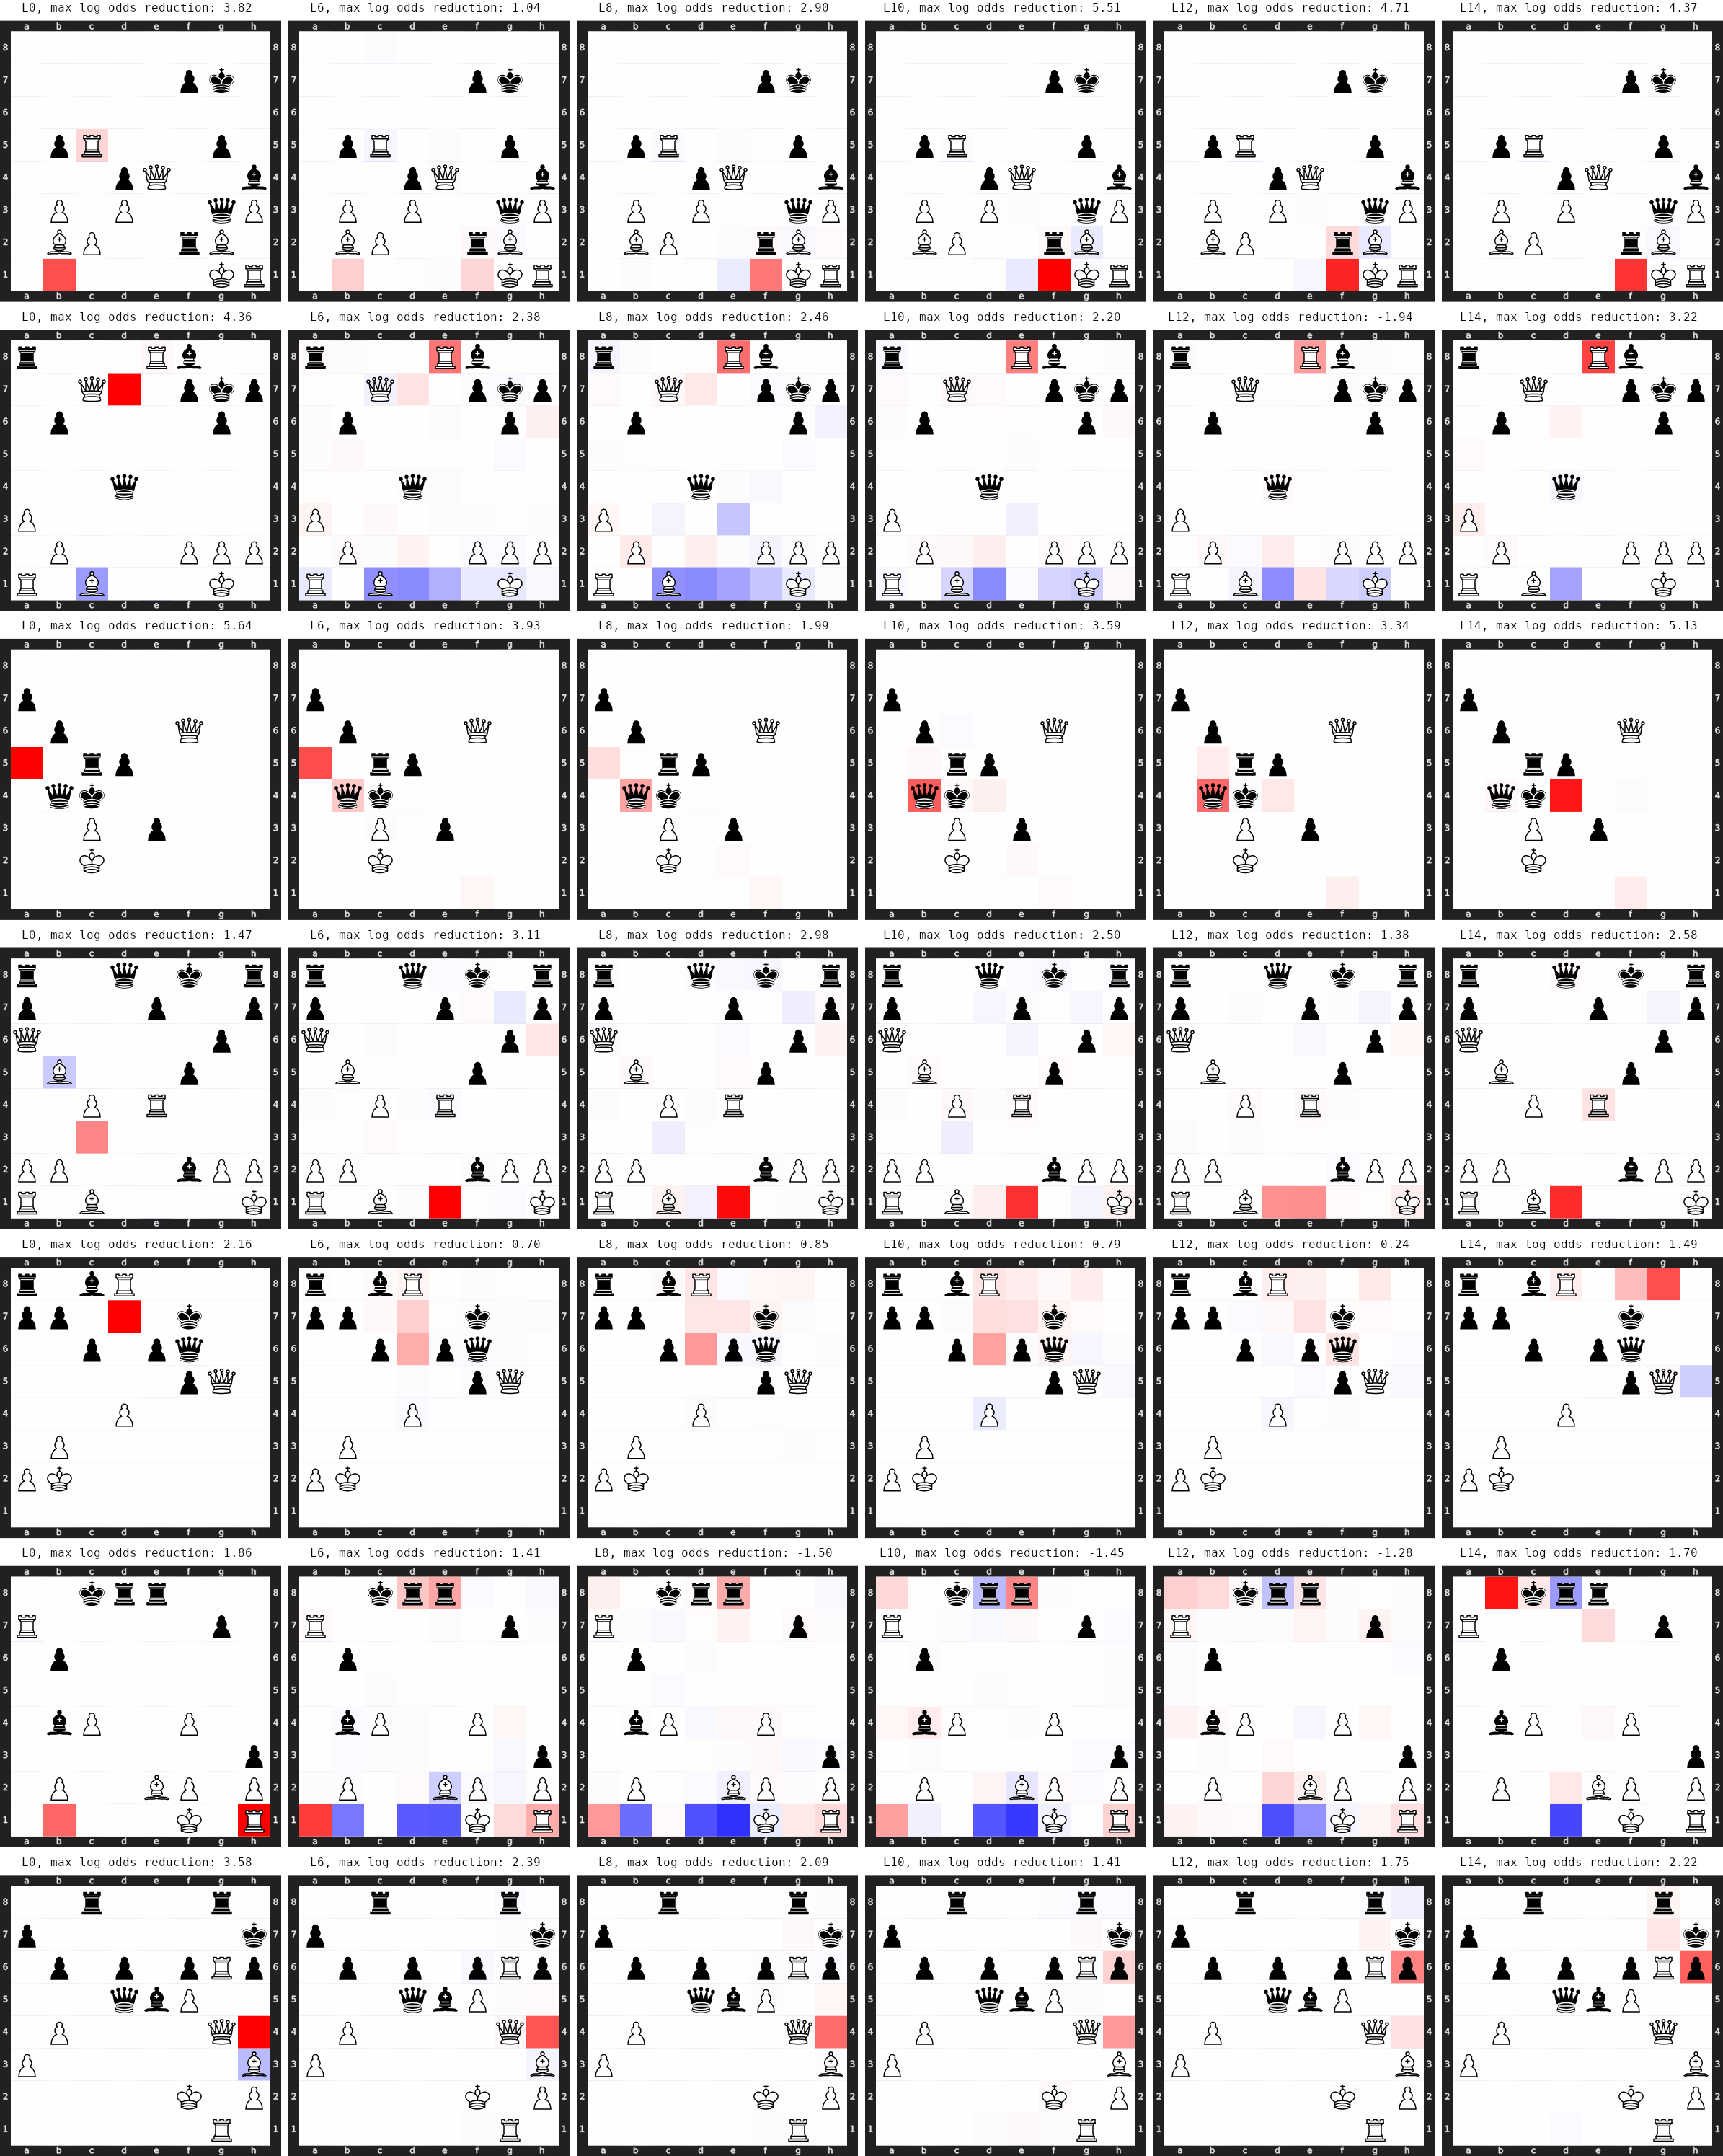

In [9]:
study.plot_examples(mask=study.alt_mask, n=7)

In [7]:
fh.set()

In [17]:
# mate_puzzles = study.puzzles[study.puzzles["Themes"].apply(lambda x: "mateIn2" in x)]
mate_puzzles = study.puzzles[study.puzzles.principal_variation.apply(lambda x: len(x) == 3)]

In [18]:
len(mate_puzzles)

32076

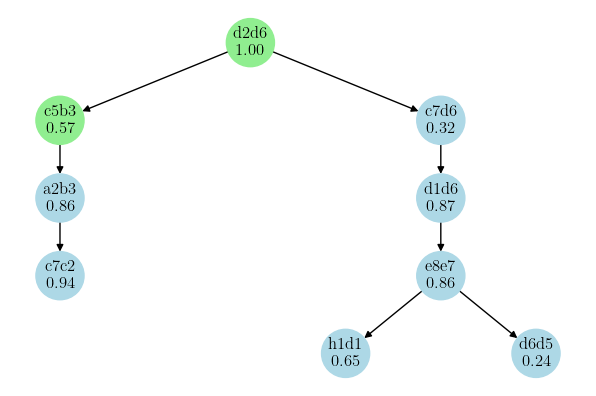

In [42]:
#puzzle = mate_puzzles.iloc[4]
puzzle = study.alt_puzzles.iloc[7]
#case = 'bad'
board = LeelaBoard.from_puzzle(puzzle)
correct_moves = puzzle.Moves.split()
total_moveset = {correct_moves[0]: {'prob': 1.0} | get_top_moves(model, board, limit=4, min_prob=0.1)}
plot_game_trees([(correct_moves, total_moveset)])#, filename=f"game_tree_{case}.pdf")

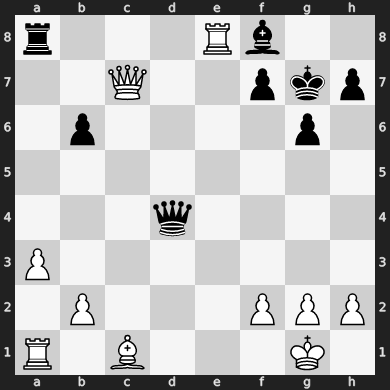

In [40]:
board.plot(show_lastmove=False)

In [41]:
import os
import glob
import cairosvg

# Get the most recently modified SVG file from .iceberg/ directory
iceberg_dir = '.iceberg/'
svg_files = glob.glob(os.path.join(iceberg_dir, '*.svg'))
if svg_files:
    latest_svg = max(svg_files, key=os.path.getmtime)
    
    # Convert SVG to PDF
    output_pdf = f'board_{case}.pdf'
    cairosvg.svg2pdf(url=latest_svg, write_to=output_pdf)
    
    print(f"Converted {latest_svg} to {output_pdf}")
else:
    print("No SVG files found in .iceberg/ directory")

Converted .iceberg/4b8bc210be1d2aad1c76677af402dbb1c1ad4b25.svg to board_good.pdf


# Global activation patching

## Residual stream

## Mate in 3 examples

11 ['c7c1', 'a1c1', 'c8c1', 'e3c1', 'e8e1']
51 ['h4h8', 'g8h8', 'f4h6', 'h8g8', 'h6g7']
68 ['d3b1', 'd2b1', 'd8d1', 'f3e1', 'd1e1']
73 ['c7d6', 'e7d8', 'c1c8', 'd8c8', 'd6c7']
89 ['f5g3', 'h2g3', 'h4g3', 'a4h4', 'h8h4']


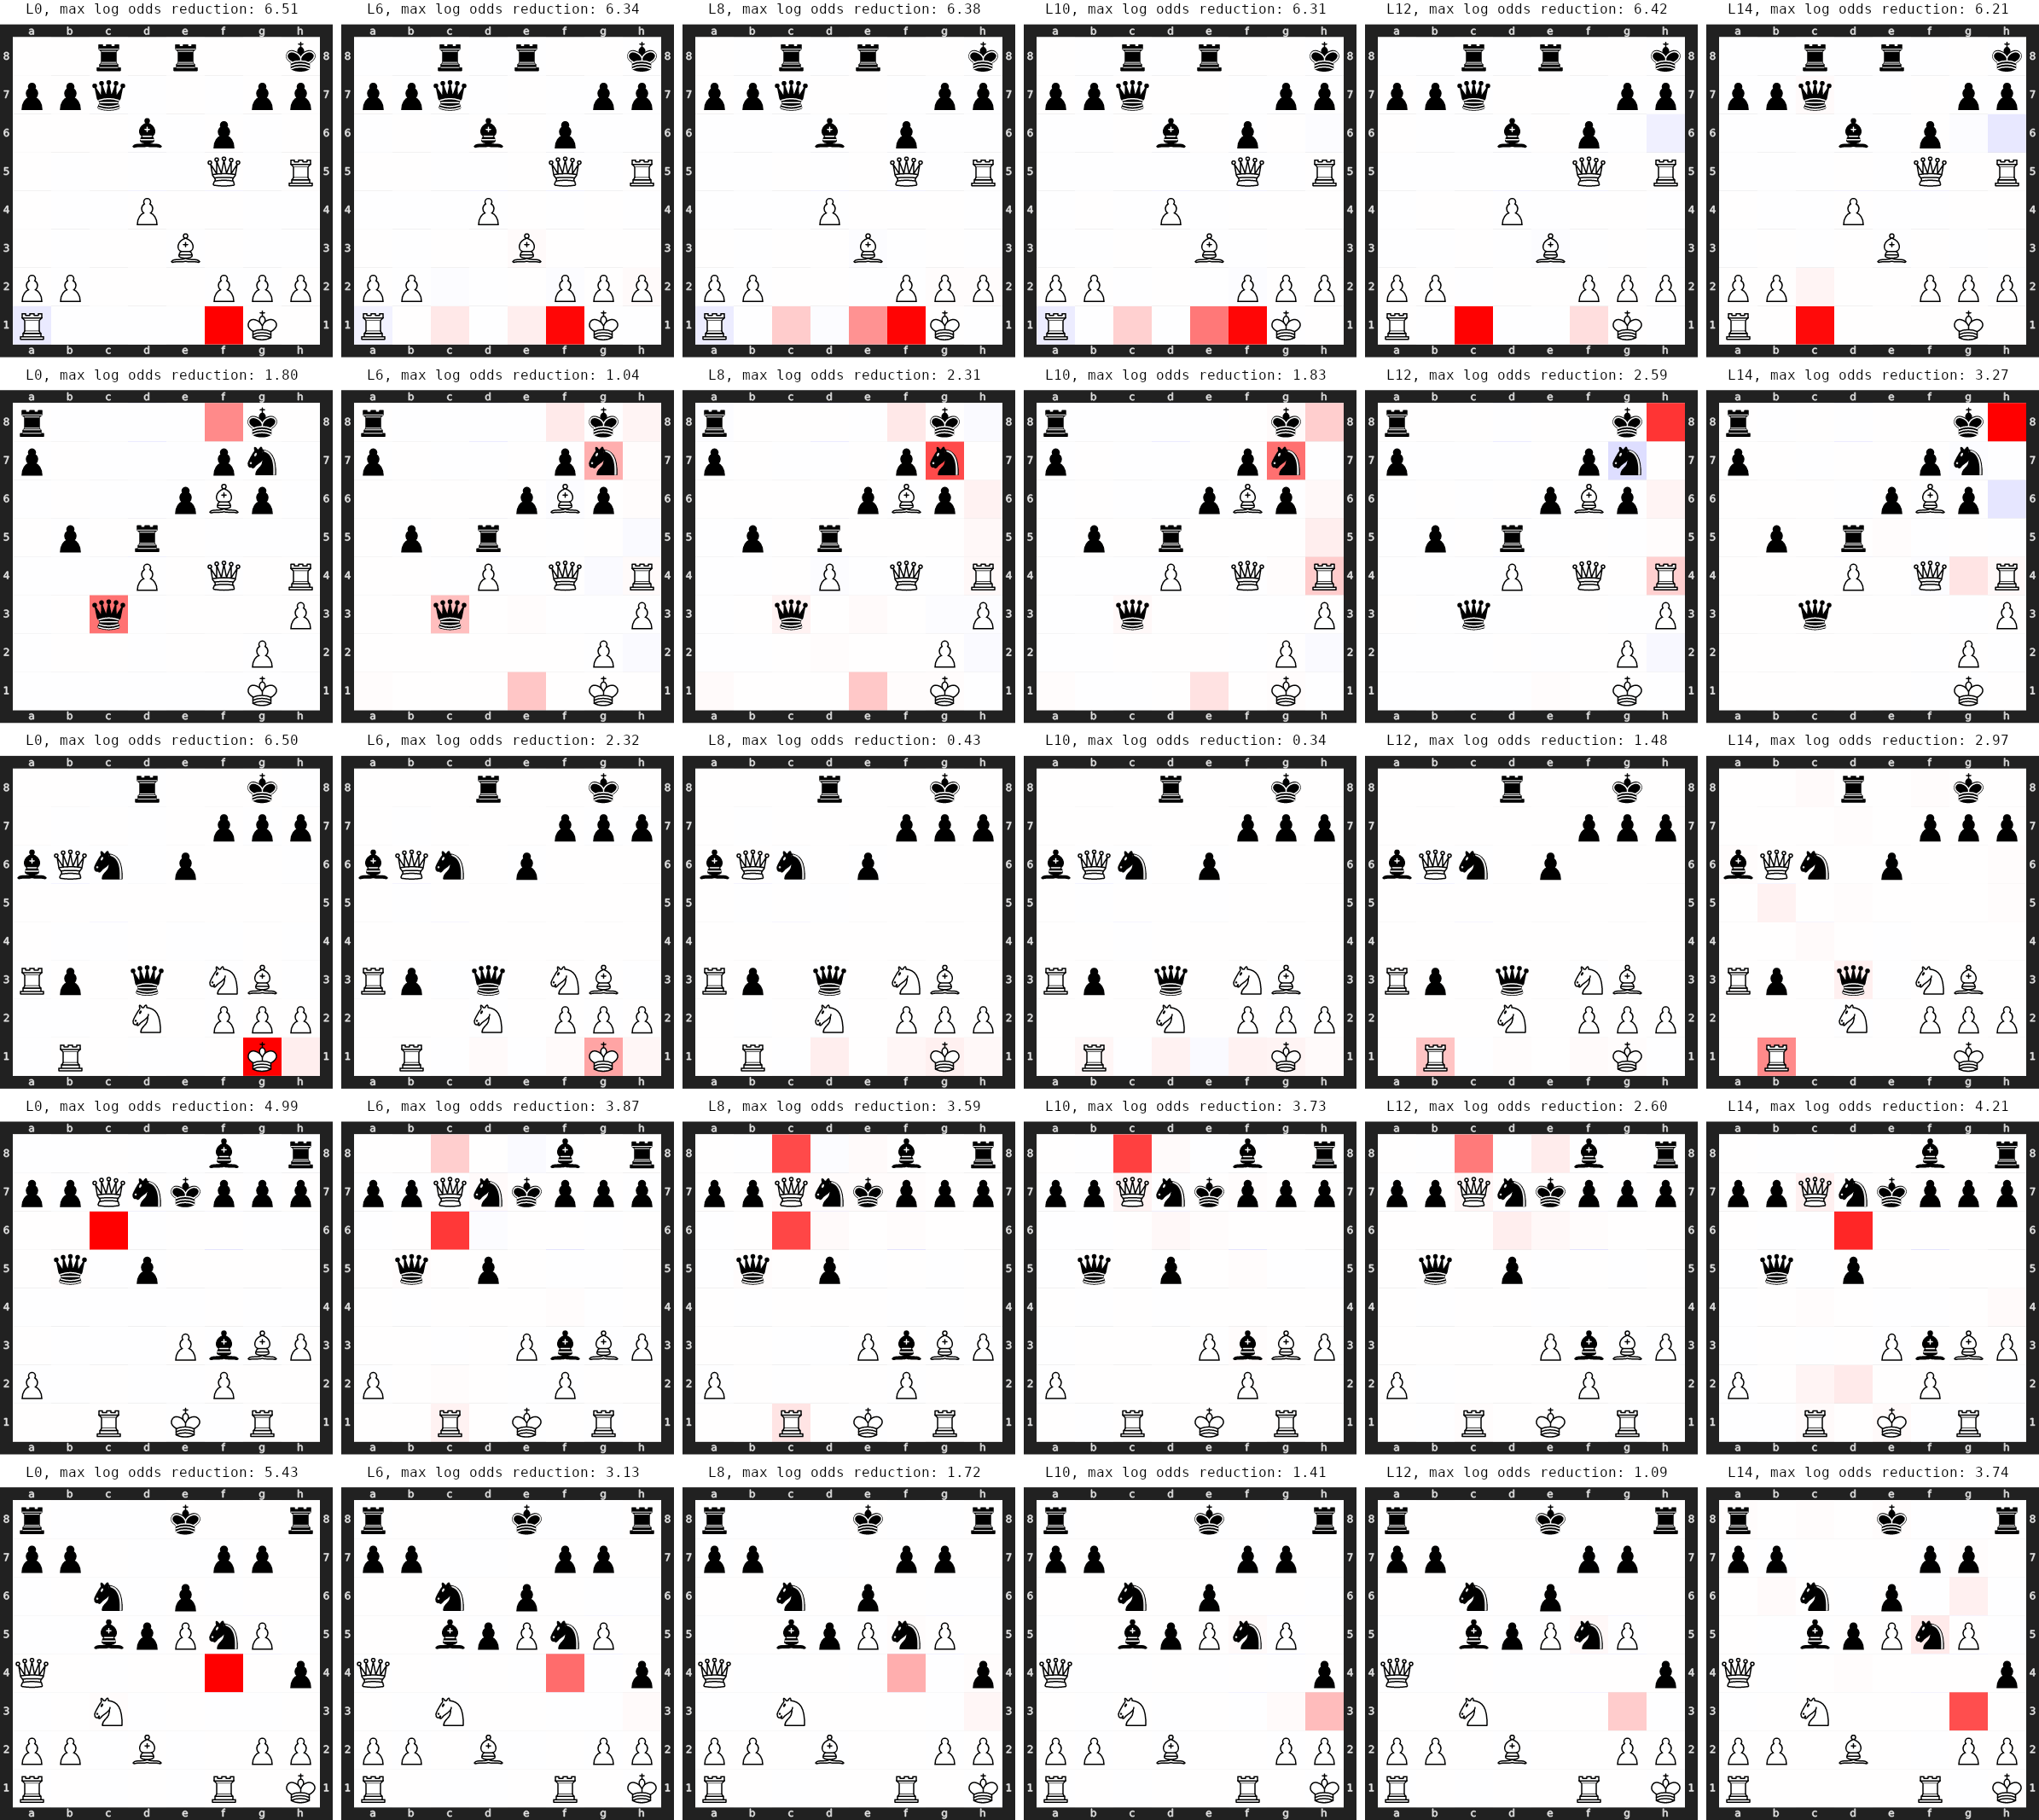

In [9]:
study.plot_examples(n=100)

## Ratings

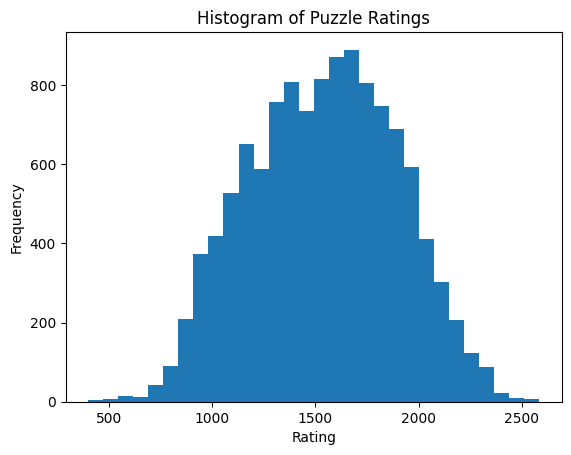

<Figure size 640x480 with 0 Axes>

In [6]:
# # Store puzzle ratings in a numpy array
# puzzle_ratings = puzzles["Rating"].to_numpy()
# puzzle_ratings_all = puzzles_all["Rating"].to_numpy()
# puzzle_ratings_no_forcing = puzzles_no_forcing["Rating"].to_numpy()

# # Plot histogram of puzzle ratings
# plt.hist(puzzle_ratings, bins=30, label="Interesting")
# plt.hist(puzzle_ratings_all, bins=30, label="All")
# plt.hist(puzzle_ratings_no_forcing, bins=30, label="No forcing")
# plt.show()

study.plot_rating_histogram(filename="rating_histogram.pdf")

In [11]:


# result = EffectStudy.get_possibility_indices(puzzles, include_starting=False)
# result_all = EffectStudy.get_possibility_indices(puzzles_all, include_starting=False)
# result_no_forcing = EffectStudy.get_possibility_indices(puzzles_no_forcing, include_starting=False)
# result_starting = get_possibility_indices(puzzles, include_starting=True)
# result_all_starting = get_possibility_indices(puzzles_all, include_starting=True)
# result_no_forcing_starting = get_possibility_indices(puzzles_no_forcing, include_starting=True)

# # Only consider cases with more than N examples
# n_examples = 10
# good_results = {k: v for k, v in result.items() if len(v) > n_examples}
# good_results_all = {k: v for k, v in result_all.items() if len(v) > n_examples}
# good_results_no_forcing = {k: v for k, v in result_no_forcing.items() if len(v) > n_examples}
# good_results_starting = {k: v for k, v in result_starting.items() if len(v) > n_examples}
# good_results_all_starting = {k: v for k, v in result_all_starting.items() if len(v) > n_examples}
# good_results_no_forcing_starting = {k: v for k, v in result_no_forcing_starting.items() if len(v) > n_examples}

# # Order by number of elements
# good_results = {k: v for k, v in sorted(good_results.items(), key=lambda item: len(item[1]), reverse=True)}
# good_results_all = {k: v for k, v in sorted(good_results_all.items(), key=lambda item: len(item[1]), reverse=True)}
# good_results_no_forcing = {k: v for k, v in sorted(good_results_no_forcing.items(), key=lambda item: len(item[1]), reverse=True)}
# good_results_starting = {k: v for k, v in sorted(good_results_starting.items(), key=lambda item: len(item[1]), reverse=True)}
# good_results_all_starting = {k: v for k, v in sorted(good_results_all_starting.items(), key=lambda item: len(item[1]), reverse=True)}
# good_results_no_forcing_starting = {k: v for k, v in sorted(good_results_no_forcing_starting.items(), key=lambda item: len(item[1]), reverse=True)}

# len(good_results), len(good_results_all), len(good_results_no_forcing), len(good_results_starting), len(good_results_all_starting), len(good_results_no_forcing_starting)

In [12]:
# # Create mask to apply to puzzles, given in indices in good_results
# good_mask = np.zeros((len(good_results), len(puzzles)), dtype=bool)
# good_mask_all = np.zeros((len(good_results_all), len(puzzles_all)), dtype=bool)
# good_mask_no_forcing = np.zeros((len(good_results_no_forcing), len(puzzles_no_forcing)), dtype=bool)
# good_mask_starting = np.zeros((len(good_results_starting), len(puzzles)), dtype=bool)
# good_mask_all_starting = np.zeros((len(good_results_all_starting), len(puzzles_all)), dtype=bool)
# good_mask_no_forcing_starting = np.zeros((len(good_results_no_forcing_starting), len(puzzles_no_forcing)), dtype=bool)
# for i, (_, idx_list) in enumerate(good_results.items()):
#     good_mask[i, idx_list] = True
# for i, (_, idx_list) in enumerate(good_results_all.items()):
#     good_mask_all[i, idx_list] = True
# for i, (_, idx_list) in enumerate(good_results_no_forcing.items()):
#     good_mask_no_forcing[i, idx_list] = True
# for i, (_, idx_list) in enumerate(good_results_starting.items()):
#     good_mask_starting[i, idx_list] = True
# for i, (_, idx_list) in enumerate(good_results_all_starting.items()):
#     good_mask_all_starting[i, idx_list] = True
# for i, (_, idx_list) in enumerate(good_results_no_forcing_starting.items()):
#     good_mask_no_forcing_starting[i, idx_list] = True

### Exporting interesting puzzles

In [8]:
{k: len(v) for k, v in study.good_results.items()}

{'123': 15658,
 '112': 7065,
 '111': 4719,
 '122': 4634,
 '12345': 3436,
 '11234': 2167,
 '12333': 1350,
 '12344': 1296,
 '11231': 831,
 '12334': 751,
 '11233': 697,
 '11123': 619,
 '11222': 572,
 '12223': 514,
 '1234567': 501,
 '12234': 428,
 '12222': 423,
 '12342': 393,
 '12233': 325,
 '11112': 292,
 '12332': 277,
 '11223': 265,
 '11122': 259,
 '1123456': 238,
 '11111': 195,
 '12311': 180,
 '1234566': 164,
 '12314': 153,
 '11221': 140,
 '1234555': 135,
 '1233456': 114}

# Effects

In [14]:
# for possibility, mask in zip(list(good_results), good_mask):
#     print(possibility)
#     try:
#         plot_rating(all_effects=all_effects, mask=mask, allowed_lengths=[3, 4, 5, 6, 7], include_starting=False)
#         plot_rating_layer(all_effects=all_effects, mask=mask, allowed_lengths=[3, 4, 5, 6, 7], include_starting=False)
#     except ValueError:
#         continue

In [18]:
# Display rows where the first move in principal_variation is different from full_model_moves


In [7]:
# Add main_moves to alt_puzzles
study.alt_puzzles["branch_1"] = [move_1 for move_1, move_2 in study.main_moves]
study.alt_puzzles["branch_2"] = [move_2 for move_1, move_2 in study.main_moves]
#study.alt_puzzles.to_pickle("interesting_puzzles_double.pkl")

In [13]:
with open("interesting_puzzles_double_alt_0_3_0_5.pkl", "wb") as f:
    pickle.dump(study.alt_puzzles, f)

In [ ]:
for possibility, mask in zip(list(study.good_results), study.good_mask):
    study.plot_residual_effects(mask=mask, allowed_lengths=[5,6,7,8,9], rating_range=(0, 5000))

Max accuracy (main, L13): 0.91 +- 0.06
Max accuracy (main, L14): 0.89 +- 0.07
Max accuracy (main, L11): 0.62 +- 0.10
Max accuracy (main, L13): 0.40 +- 0.10
Max accuracy (random_model, L3): 0.46 +- 0.11
Max accuracy (random_model, L11): 0.38 +- 0.11
Max accuracy (random_model, L1): 0.07 +- 0.05
Max accuracy (random_model, L0): 0.02 +- 0.03


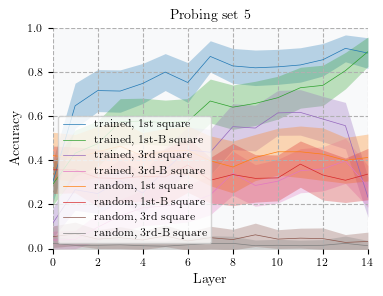

In [14]:
case_number = '5'
n_seeds = 5

SETTING_TO_PRETTY_NAME = {
    ("main", 1): "trained, 1st square",
    ("main", 2): "trained, 1st-B square",
    ("main", 3): "trained, 3rd square",
    ("main", 4): "trained, 3rd-B square",
    ("random_model", 1): "random, 1st square",
    ("random_model", 2): "random, 1st-B square",
    ("random_model", 3): "random, 3rd square",
    ("random_model", 4): "random, 3rd-B square",
}

if len(str(case_number)) == 7:
    SETTING_TO_PRETTY_NAME[("main", 7)] = "trained, 7th square"
    SETTING_TO_PRETTY_NAME[("random_model", 7)] = "random, 7th square"

def plot_probe_results(split="all"):
    fh.set(fast=False)
    plt.figure(figsize=(fh.HALF_WIDTH*1.5, 2*1.5))

    for i, setting in enumerate(["main", "random_model"]):
        for j, goal_square in enumerate(range(1, 5)):
            results = np.zeros((15, n_seeds))
            for seed in range(n_seeds):
                with open(f"results/probing_{case_number}/{split}/{seed}/{goal_square}/{setting}.pkl", "rb") as f:
                    new_results = pickle.load(f)
                    results[:, seed] = new_results["accuracies"]

            means = results.mean(-1)
            squared_seed_errors = results.var(-1) / results.shape[-1]
            # Size of the eval dataset is 30% of all puzzles
            squared_acc_errors = means * (1 - means) / (0.3 * 309)
            # 2 sigma errors
            errors = 2 * np.sqrt(squared_seed_errors + squared_acc_errors)

            max_layer = means.argmax()

            print(
                f"Max accuracy ({setting}, L{max_layer}): {means[max_layer]:.2f} +- {errors[max_layer]:.2f}"
            )
            plt.plot(
                means,
                label=SETTING_TO_PRETTY_NAME[(setting, goal_square)],
                color=fh.COLORS[2*j + i],
                linewidth=fh.LINE_WIDTH,
            )
            plt.fill_between(
                range(15),
                means - errors,
                means + errors,
                color=fh.COLORS[2*j + i],
                alpha=fh.ERROR_ALPHA,
                linewidth=0,
            )

    plt.title(f"Probing set {case_number}")
    plt.xlabel("Layer")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower left")

    plt.ylim(0, 1.0)
    plt.xlim(0, 14)
    plt.gca().spines[:].set_visible(False)
    plt.gca().set_facecolor(fh.PLOT_FACE_COLOR)
    plt.grid(linestyle="--")
    plt.grid(which="minor", alpha=0.3, linestyle="--")

plot_probe_results()
fh.save(f"probing_{case_number}.pdf")

In [62]:
EffectStudy.map_to_possibility_alt(*study.main_moves[0])

{'g6g7': '1'}
{'g6g7': '1', 'h7h6': '2'}
{'g6g7': '1', 'h7h6': '2', 'd3h7': '3'}
{'g6f6': 'a'}
{'g6f6': 'a', 'c5d3': 'b'}
{'g6f6': 'a', 'c5d3': 'b', 'c4d3': 'c'}


['1', '2', '3', 'a', 'b', 'c']

In [54]:
 if study.alt_puzzles is not None:
     print(study.good_results.keys())
 else:
     print(study.main_moves.keys())

dict_keys(['123', '112', '111', '122', '12345', '11234', '12333', '12344', '11231', '12334', '11233', '11123', '11222', '12223', '1234567', '12234', '12222', '12342', '12233', '11112', '12332', '11223', '11122', '1123456', '11111', '12311', '1234566', '12314', '11221', '1234555', '1233456', '1123455', '1112345', '12211', '1222345', '123456789', '1123444', '12341', '1234445', '12213'])


In [57]:
study.main_moves

[[['g6g7', 'h7h6', 'd3h7'], ['g6f6', 'c5d3', 'c4d3']],
 [['a4b6', 'c7b6', 'a8b7'], ['a4c5', 'c7f4', 'e7e3']],
 [['g4h3', 'h1g2', 'g6g2'], ['g4f3', 'g1f1', 'g6d3']],
 [['f2f1', 'g1f1', 'g3f2'], ['f2g2', 'e4g2', 'g3e3']],
 [['a6f1', 'h3h4', 'h1h2'], ['a6c8', 'e7h4', 'h6g7']],
 [['d4d1', 'e8e1', 'd1e1'], ['a8e8', 'c1e3', 'd4b2']],
 [['f6f1', 'e3e2', 'f1e2'], ['f6d4', 'c4b5', 'd4b4']],
 [['c5b3', 'a2b3', 'c7c2'], ['c7d6', 'd1d6', 'e8e7']],
 [['d8d1', 'e4e1', 'd1e1'], ['f5e4', 'c1h6', 'f8f7']],
 [['c6a6', 'a7b8', 'c5d7'], ['c6c7', 'a7a8', 'c7c6']],
 [['c7d8', 'c6e8', 'd8e8'], ['c7b8', 'e7c8', 'b8c8']],
 [['g5g8', 'f7e7', 'g8e8'], ['d8f8', 'f7f8', 'g5f6']],
 [['d8d1', 'e2d1', 'e8e1'], ['c8b8', 'a7a1', 'd8d2']],
 [['g6h6', 'h7h6', 'g4h4'], ['g6g7', 'h7h8', 'g7g8']]]

In [32]:
study.good_results

{'122345': [3451, 15867, 20062, 26658],
 '112345': [2587, 44560, 47389],
 '112334': [4375, 21897],
 '123455': [269],
 '123425': [6502],
 '123456': [32264],
 '122344': [41329],
 '123445': [42678]}

In [34]:
study.puzzles.iloc[[4375, 21897]]

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,principal_variation,full_pv_probs,full_model_moves,full_wdl,sparring_full_pv_probs,sparring_full_model_moves,sparring_wdl,different_targets,corrupted_fen
9324,09WQ2,2R5/5pk1/8/1pp3p1/3pQ2b/1P1P2qP/1BP2rB1/6KR w ...,c8c5 f2f1 g1f1 g3f2,1963,83,87,115,attraction mate mateIn2 middlegame pin sacrifi...,https://lichess.org/JWrw0RWl#56,NaN,"[f2f1, g1f1, g3f2]","[0.48180514574050903, 1.0, 0.9152519106864929]","[f2f1, g1f1, g3f2]","[0.19895361363887787, 0.7666050791740417, 0.03...","[0.015839725732803345, 1.0, 0.40310412645339966]","[g7h6, g1f1, g3f2]","[0.0063996990211308, 0.9716481566429138, 0.021...",False,8/5pk1/8/1p4p1/3pQ2b/1P1P2qP/1BP2rB1/1R4KR b -...
46601,0lzSv,2r1k2r/2qn1ppp/3b4/pBn1p3/Pp2P1PP/4BP2/P1PQ4/2...,d2d6 c5b3 c1b1 c7c2,1685,75,95,12075,discoveredAttack mate mateIn2 middlegame pin q...,https://lichess.org/E78fsLiJ#36,Sicilian_Defense Sicilian_Defense_Najdorf_Vari...,"[c5b3, c1b1, c7c2]","[0.5746010541915894, 0.07931384444236755, 0.86...","[c5b3, a2b3, c7c2]","[0.11007799953222275, 0.2499588429927826, 0.63...","[0.0567881315946579, 0.45238038897514343, 0.30...","[c7d6, c1b2, c7c2]","[0.024271631613373756, 0.6687401533126831, 0.3...",True,2r1k2r/2qn1ppp/3Q4/pBn1p3/Pp2P1PP/4BP2/P1P1R3/...


In [35]:
study.main_moves

[[['g6g7', 'h7h6', 'd3h7'], ['g6f6', 'c5d3', 'c4d3']],
 [['a4b6', 'c7b6', 'a8b7'], ['a4c5', 'c7f4', 'e7e3']],
 [['g4h3', 'h1g2', 'g6g2'], ['g4f3', 'g1f1', 'g6d3']],
 [['f2f1', 'g1f1', 'g3f2'], ['f2g2', 'e4g2', 'g3e3']],
 [['a6f1', 'h3h4', 'h1h2'], ['a6c8', 'e7h4', 'h6g7']],
 [['d4d1', 'e8e1', 'd1e1'], ['a8e8', 'c1e3', 'd4b2']],
 [['f6f1', 'e3e2', 'f1e2'], ['f6d4', 'c4b5', 'd4b4']],
 [['c5b3', 'a2b3', 'c7c2'], ['c7d6', 'd1d6', 'e8e7']],
 [['d8d1', 'e4e1', 'd1e1'], ['f5e4', 'c1h6', 'f8f7']],
 [['c6a6', 'a7b8', 'c5d7'], ['c6c7', 'a7a8', 'c7c6']],
 [['c7d8', 'c6e8', 'd8e8'], ['c7b8', 'e7c8', 'b8c8']],
 [['g5g8', 'f7e7', 'g8e8'], ['d8f8', 'f7f8', 'g5f6']],
 [['d8d1', 'e2d1', 'e8e1'], ['c8b8', 'a7a1', 'd8d2']],
 [['g6h6', 'h7h6', 'g4h4'], ['g6g7', 'h7h8', 'g7g8']]]

In [26]:
study.load_results()

In [24]:
fh.set()

In [9]:
[(key, len(value)) for key, value in study.good_results.items()]

[('123456', 22),
 ('112345', 13),
 ('112334', 8),
 ('123445', 8),
 ('123425', 7),
 ('112344', 7),
 ('122345', 4),
 ('123455', 4),
 ('123435', 2),
 ('122334', 1)]

93
46
42
28
28
27
17
10
7
6
2
2
1


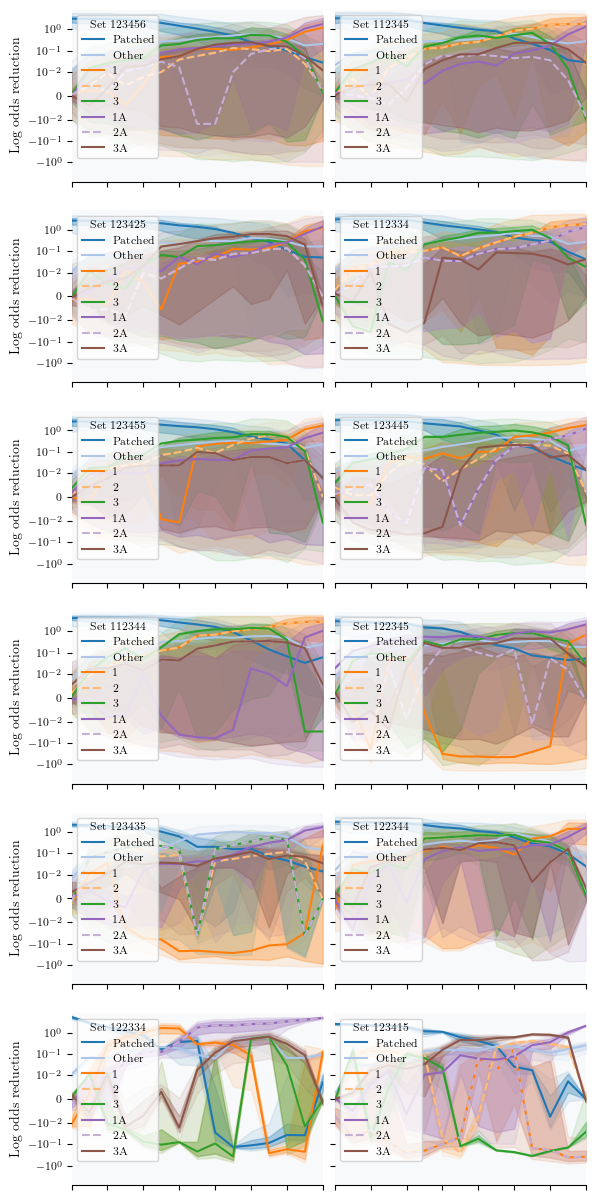

<Figure size 640x480 with 0 Axes>

In [24]:
study.plot_residual_effects_grid(n_cols=2, allowed_lengths=[3], filename="residual_effects_double_alt.pdf", log=True)

In [134]:
good_board = LeelaBoard.from_fen('2r3k1/1p3ppp/p5q1/2r5/8/2Q4P/P4PP1/3RR1K1 w - - 1 25')

In [149]:
good_board = LeelaBoard.from_fen('7k/1pR2ppp/8/1b6/8/2Q4P/P4PP1/3R2K1 w - - 1 25')

In [304]:
#good_board = LeelaBoard.from_fen('2k5/p1p4p/1pK5/4N1r1/2B1Qp2/P5q1/Pr6/8 w - - 1 25')
#good_board = LeelaBoard.from_fen('8/1B1pbp2/3pkp2/4r3/4r3/5B2/8/4Q3 w - - 1 25')
#good_board = LeelaBoard.from_fen('7k/5Q1p/3q4/8/8/4B3/1R4P1/5B1K w - - 1 25')
#good_board = LeelaBoard.from_fen('4k3/1N1pppB1/4B3/4N2b/b7/8/8/R3K2R w - - 1 25')
#good_board = LeelaBoard.from_fen('4k3/1N1ppp2/4B2B/2n1N1n1/8/8/8/2R1K1R1 w - - 1 25')
#good_board = LeelaBoard.from_fen('4k3/b2ppp1N/4B2p/B1n1N1n1/8/8/8/r1R3RK w - - 1 25')
good_board = LeelaBoard.from_fen('4k3/b2ppp1N/4B2p/B1n1N1n1/8/8/8/r1R3RK w - - 1 25')
good_board = LeelaBoard.from_fen('3k4/N1ppp2b/p2B4/1n1N1n1B/8/8/8/KR3R1r w - - 1 25')

In [319]:
good_board = LeelaBoard.from_fen('7K/4P1p1/5R2/8/8/8/8/7k w - - 1 25')

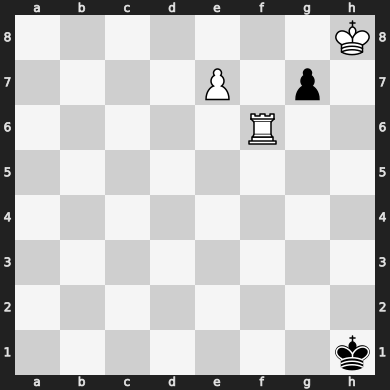

In [320]:
good_board

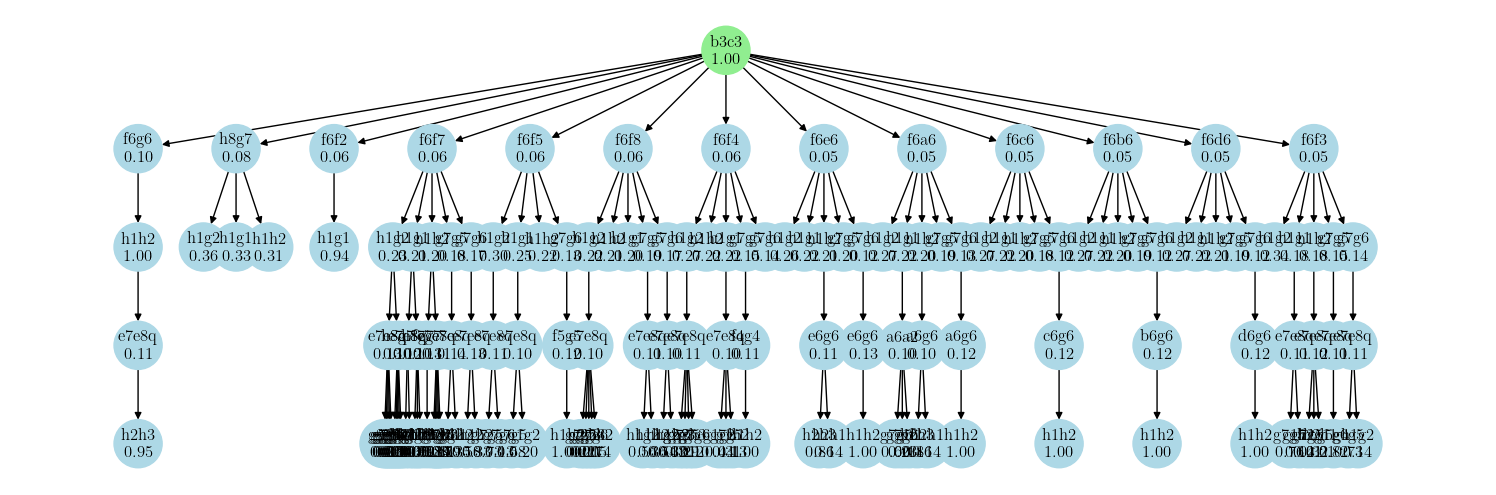

In [321]:
total_moveset = {correct_moves[0]: {'prob': 1.0} | get_top_moves(model, good_board, limit=4, min_prob=0.05)}
plot_game_trees([(correct_moves, total_moveset)], width=15, height=5)

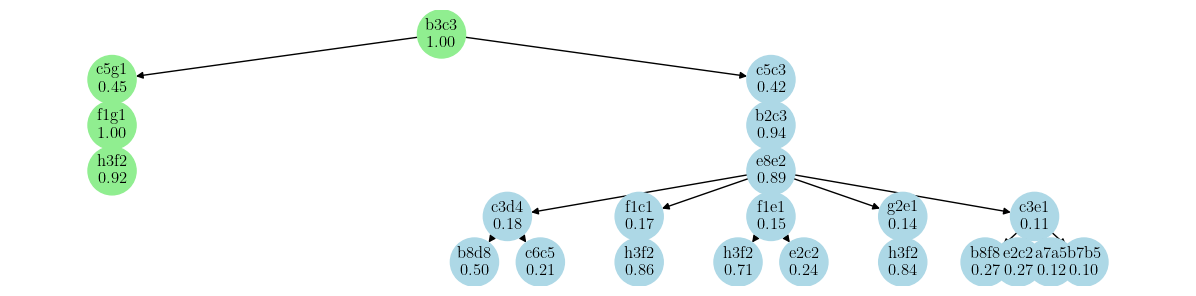

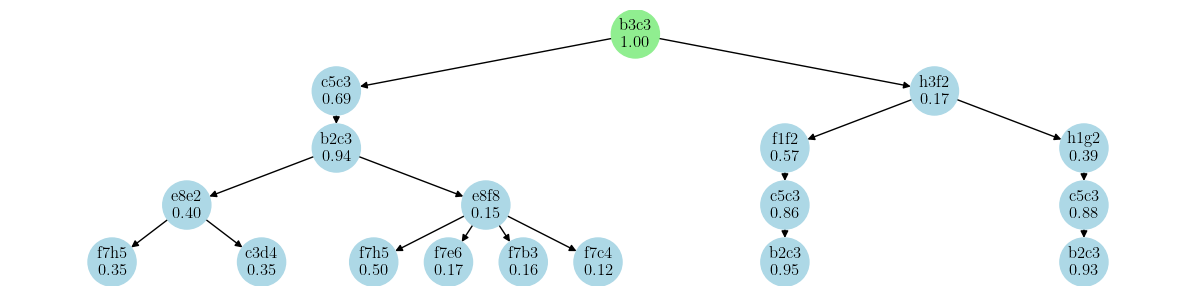

0 ['c5g1', 'f1g1', 'h3f2'] [0.45344680547714233, 1.0, 0.9218518137931824]


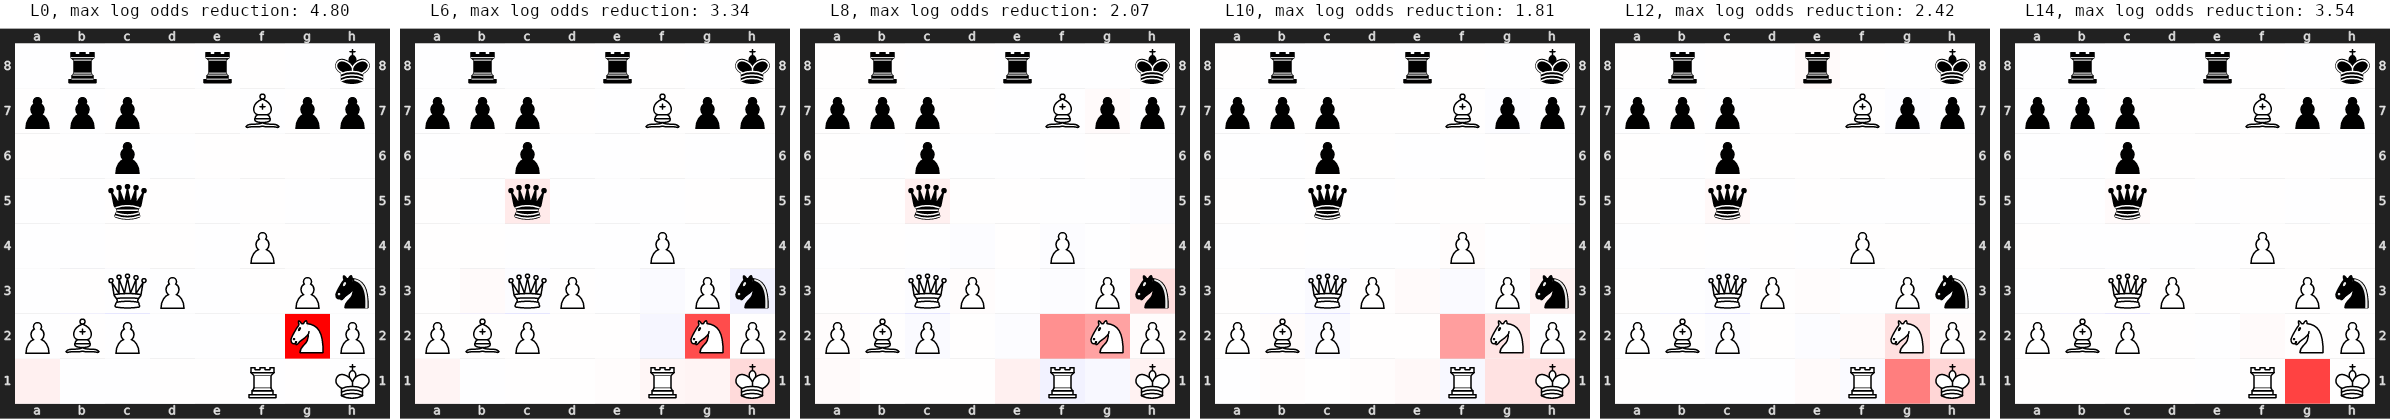

In [115]:
mask_index = list(study.good_results).index('112334')
mask = study.good_mask[mask_index].copy()
puzzle_case = 11
puzzle_pos = np.where(mask)[0][puzzle_case]
mask[:] = False
mask[puzzle_pos] = True
puzzle = study.puzzles[mask].iloc[0]
board = LeelaBoard.from_puzzle(puzzle)
corrupted_board = LeelaBoard.from_fen(puzzle.corrupted_fen)
correct_moves = puzzle.Moves.split()
total_moveset = {correct_moves[0]: {'prob': 1.0} | get_top_moves(model, board, limit=5, min_prob=0.05)}
total_moveset_corrupted = {correct_moves[0]: {'prob': 1.0} | get_top_moves(model, corrupted_board, limit=4, min_prob=0.05)}
plot_game_trees([(correct_moves, total_moveset)], width=12, height=3)
plot_game_trees([(correct_moves, total_moveset_corrupted)], width=12, height=3)
study.plot_examples(mask=mask, n=1)

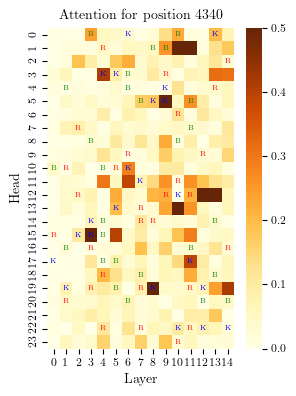

In [116]:
study.plot_attention(puzzle_pos, mask_index)

{'f8c7': 0.1706513613462448, 'b8c7': 0.1142272874712944, 'f8e7': -0.09654686599969864, 'b8e7': -0.031023822724819183, 'e7f5': -0.00550730200484395}


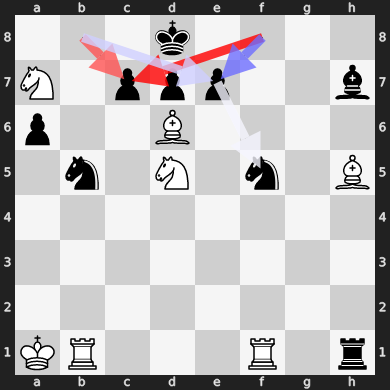

In [307]:
attribution = attention_attribution(
    [good_board], layer=12, head=12, model=model, return_pt=True
)[0]
values, colors = top_k_attributions(attribution, good_board, k=5)
print(values)
good_board.plot(arrows=colors, show_lastmove=False)

In [73]:
from leela_interp.tools.attention import attention_attribution, top_k_attributions
from leela_interp.tools.patching import activation_patch

In [41]:
study.all_attentions[mask].shape

torch.Size([1, 15, 24])

In [52]:
diogo_third_to_first_vs_other_ablations(model, board, puzzle, 12, 12)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 11.83it/s]


(12, 12) [0]


100%|██████████| 1/1 [00:00<00:00, 12.80it/s]


(tensor([0.3869]), tensor([-0.1667]))

In [51]:
def diogo_third_to_first_vs_other_ablations(model, board, puzzle, layer, head):
    first_target_square = puzzle.principal_variation[0][2:4]
    third_target_square = puzzle.principal_variation[2][2:4]
    first_target_index = board.sq2idx(first_target_square)
    third_target_index = board.sq2idx(third_target_square)

    def _third_to_first_ablate(location, model, batch_indices):
        layer, head = location
        print(location, batch_indices)
        model.attention_scores(layer).output[
            torch.arange(len(batch_indices)),
            head,
            first_target_index,
            third_target_index,
        ] = 0

    def _other_ablate(location, model, batch_indices):
        layer, head = location
        other_mask = torch.ones(
            len(batch_indices), 64, 64, dtype=torch.bool, device="cpu"
        )
        other_mask[
            torch.arange(len(batch_indices)),
            first_target_index,
            third_target_index,
        ] = False
        model.attention_scores(layer).output[:, head][other_mask] = 0

    third_to_first_effects = -patching.patch(
        patching_func=_third_to_first_ablate,
        locations=[(layer, head)],
        model=model,
        boards=[board],
        batch_size=1,
        pbar="batch",
    )
    other_effects = -patching.patch(
        patching_func=_other_ablate,
        locations=[(layer, head)],
        model=model,
        boards=[board],
        batch_size=1,
        pbar="batch",
    )

    return third_to_first_effects.squeeze(-1), other_effects.squeeze(-1)

In [42]:
from leela_interp.tools import patching

In [20]:
# Initialize an empty list to store results for each key
results = []

# Iterate through each key in study.good_results
for key in study.good_results.keys():
    # Get the puzzles for the current key
    key_puzzles = study.puzzles.iloc[study.good_results[key]]
    ind = np.arange(len(study.alt_puzzles))[study.alt_puzzles.index.isin(key_puzzles.index)]
    
    # Get the corresponding main moves for the puzzles in study.alt_puzzles
    key_main_moves = [study.main_moves[i] for i in ind]
    
    # Compare principal variations with main moves
    key_result = [
        puzzle.principal_variation == main_move[0]
        for (_, puzzle), main_move in zip(key_puzzles.iterrows(), key_main_moves)
    ]
    
    results.append(key_result)

# results now contains the comparison for each key
[(sum(result), len(result)) for result in results]

[(88, 93),
 (45, 46),
 (40, 42),
 (27, 28),
 (28, 28),
 (26, 27),
 (17, 17),
 (10, 10),
 (7, 7),
 (6, 6),
 (2, 2),
 (2, 2),
 (1, 1)]

In [55]:
[[get_top_moves(model, LeelaBoard.from_puzzle(puzzle), limit=1, min_prob=0.3) for _, puzzle in study.puzzles.iloc[study.good_results[key]].iterrows()] for key in study.good_results.keys()]

[[{'g4h3': {'prob': 0.5446300506591797}, 'g4f3': {'prob': 0.3424844443798065}},
  {'a8e8': {'prob': 0.5885780453681946},
   'd4d1': {'prob': 0.32572367787361145}},
  {'f6d4': {'prob': 0.5152167081832886}, 'f6f1': {'prob': 0.3734111189842224}},
  {'d8d1': {'prob': 0.4816689193248749},
   'f5e4': {'prob': 0.3826422393321991}}],
 [{'a4b6': {'prob': 0.5255542993545532},
   'a4c5': {'prob': 0.34985116124153137}},
  {'c8b8': {'prob': 0.5169634819030762}, 'd8d1': {'prob': 0.3585505187511444}},
  {'g6h6': {'prob': 0.40288934111595154},
   'g6g7': {'prob': 0.3197418451309204}}],
 [{'f2f1': {'prob': 0.4818047881126404},
   'f2g2': {'prob': 0.44594505429267883}},
  {'c5b3': {'prob': 0.5746013522148132},
   'c7d6': {'prob': 0.32112061977386475}}],
 [{'g6g7': {'prob': 0.5534352660179138},
   'g6f6': {'prob': 0.36279740929603577}}],
 [{'a6f1': {'prob': 0.5961458683013916},
   'a6c8': {'prob': 0.3569292724132538}}],
 [{'c6a6': {'prob': 0.5479968786239624},
   'c6c7': {'prob': 0.33223482966423035}}],


In [51]:
study.good_results

{'122345': [3451, 15867, 20062, 26658],
 '112345': [2587, 44560, 47389],
 '112334': [4375, 21897],
 '123455': [269],
 '123425': [6502],
 '123456': [32264],
 '122344': [41329],
 '123445': [42678]}

In [70]:
study.export_puzzles('1123344')

In [72]:
len(study.good_results['1123344'])

57

In [8]:
# for possibility, mask in zip(list(study.good_results), study.good_mask):
#     print(possibility)
#     try:
#         #print("Easy puzzles")
#         study.plot_residual_effects(mask=mask, allowed_lengths=[5,6,7,8,9], rating_range=(0, 5000))
#         #print("Medium puzzles")
#         study.plot_residual_effects(mask=mask, allowed_lengths=[5,6,7,8,9], rating_range=(1000, 2000))
#         #print("Hard puzzles")
#         study.plot_residual_effects(mask=mask, allowed_lengths=[5,6,7,8,9], rating_range=(2000, 3000))
#     except ValueError:
#         continue

# Ratings

In [1]:
study.plot_rating_grid(allowed_lengths=[3,4,5,6,7,8,9], n_cols=4)
study.plot_rating_layer_grid(allowed_lengths=[3,4,5,6,7,8,9], n_cols=4)

NameError: name 'study' is not defined

## Attention heads

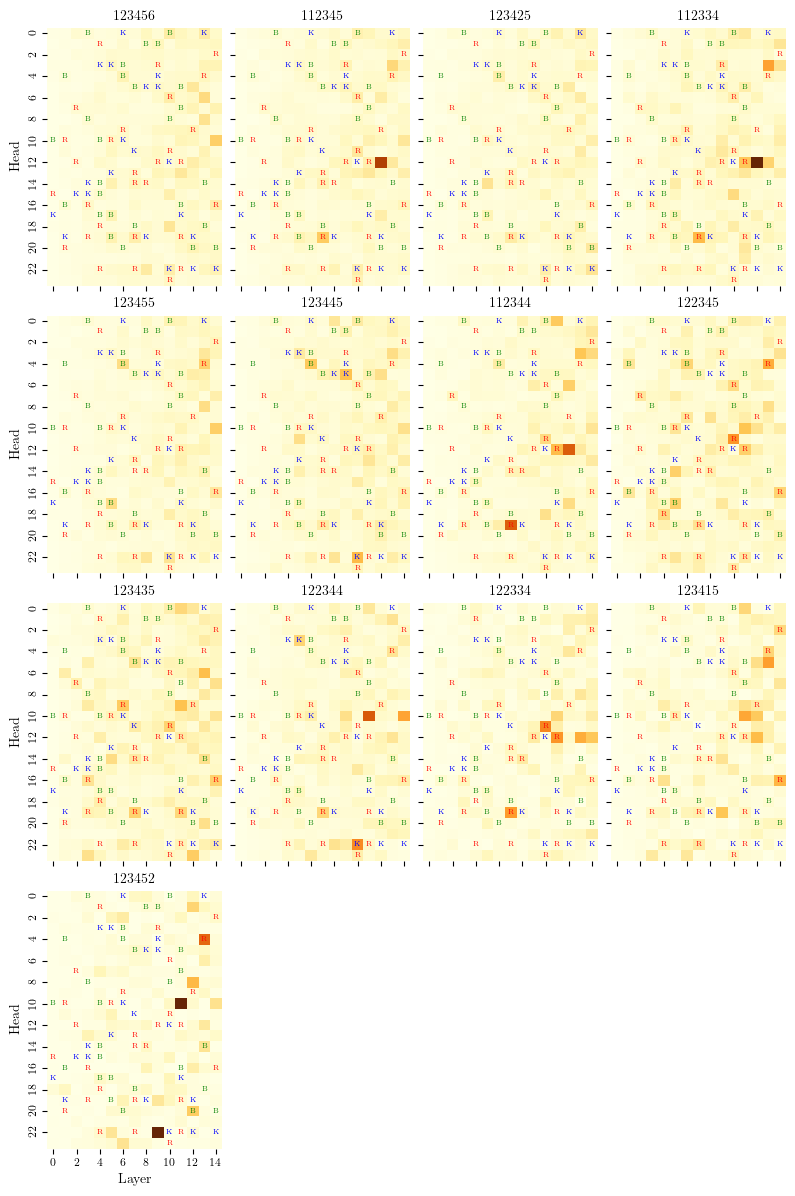

In [66]:
study.plot_attention_grid(allowed_lengths=[3,4,5,6,7,8,9], n_cols=4, vmax=0.73)
study.create_head_to_possibilities_dict()
study.create_head_to_possibilities_dict_with_effects()

In [16]:
[(key, len(study.good_results[key])) for key in study.good_results.keys()]

[('123456', 93),
 ('112345', 46),
 ('123425', 42),
 ('112334', 28),
 ('123455', 28),
 ('123445', 27),
 ('112344', 17),
 ('122345', 10),
 ('123435', 7),
 ('122344', 6),
 ('122334', 2),
 ('123415', 2),
 ('123452', 1)]

In [17]:
study.export_puzzles('112334')

In [78]:
# Convert the dict of 2D arrays to a 3D numpy array
keys = sorted(study.all_heads.keys())
first_array = study.all_heads[keys[0]]
num_rows, num_cols = first_array.shape
num_keys = len(keys)

all_heads_3d = np.zeros((num_keys, num_rows, num_cols))

for i, key in enumerate(keys):
    all_heads_3d[i] = study.all_heads[key]

print(f"Shape of the 3D array: {all_heads_3d.shape}")
print(f"Dimensions: {num_keys} keys x {num_rows} rows x {num_cols} columns")


Shape of the 3D array: (10, 15, 24)
Dimensions: 10 keys x 15 rows x 24 columns


In [79]:
all_heads_mean = np.mean(all_heads_3d, axis=0)

In [80]:
def dict_to_latex_table_2(data_dict, all_heads_mean):
    # Get the keys and sort them
    keys = sorted(data_dict.keys())
    
    # Get the shape of the first array to determine the number of columns
    first_array = data_dict[keys[0]]
    num_rows, num_cols = first_array.shape
    
    # Flatten the all_heads_mean array and get indices of top 10 values
    flat_indices = np.argsort(all_heads_mean.flatten())[-10:]
    
    # Convert flat indices to 2D indices
    columns_to_include = [(idx // num_cols, idx % num_cols) for idx in flat_indices[::-1]]
    
    # Start the LaTeX table
    latex_table = "\\begin{tabular}{l|" + "c" * len(columns_to_include) + "}\n"
    latex_table += "Key & " + " & ".join([f"L{i}H{j}" for i, j in columns_to_include]) + " \\\\\n"
    latex_table += "\\hline\n"
    
    # Add data rows
    for key in keys:
        array = np.nan_to_num(data_dict[key])
        row_data = []
        for i, j in columns_to_include:
            value = array[i, j]
            if abs(value) > 0.3:
                row_data.append(f"\\textbf{{{value:.2f}}}")
            elif abs(value) < 0.1:
                row_data.append(f"\\textcolor{{gray}}{{{value:.2f}}}")
            else:
                row_data.append(f"{value:.2f}")
        latex_table += f"{key} & " + " & ".join(row_data) + " \\\\\n"
    
    # End the LaTeX table
    latex_table += "\\end{tabular}"
    
    return latex_table

# Example usage
latex_output_2 = dict_to_latex_table_2(study.all_heads, all_heads_mean)
print(latex_output_2)


\begin{tabular}{l|cccccccccc}
Key & L12H12 & L12H17 & L7H19 & L13H3 & L5H14 & L12H6 & L10H22 & L13H12 & L14H1 & L13H18 \\
\hline
111 & \textcolor{gray}{0.02} & \textcolor{gray}{0.00} & \textcolor{gray}{0.08} & \textcolor{gray}{0.03} & \textcolor{gray}{0.04} & \textcolor{gray}{0.01} & \textcolor{gray}{0.05} & \textcolor{gray}{0.02} & 0.10 & \textcolor{gray}{0.09} \\
112 & \textbf{0.52} & 0.16 & 0.19 & 0.16 & 0.13 & 0.15 & \textcolor{gray}{0.10} & 0.13 & 0.11 & \textcolor{gray}{0.07} \\
11223 & \textbf{0.63} & \textcolor{gray}{0.10} & 0.18 & 0.21 & 0.20 & 0.27 & \textcolor{gray}{0.08} & 0.27 & \textcolor{gray}{0.09} & 0.10 \\
11231 & \textcolor{gray}{0.09} & \textbf{0.96} & 0.16 & 0.15 & 0.18 & 0.10 & 0.14 & \textcolor{gray}{0.09} & 0.17 & \textcolor{gray}{0.04} \\
11233 & \textbf{0.57} & 0.24 & 0.20 & 0.15 & 0.10 & 0.11 & 0.13 & \textcolor{gray}{0.09} & 0.11 & \textcolor{gray}{0.02} \\
11234 & \textbf{0.50} & \textbf{0.38} & 0.21 & 0.21 & 0.15 & 0.23 & \textbf{0.32} & 0.20 & 0.16 & \tex

In [58]:
# import numpy as np
# def dict_to_latex_table(data_dict):
#     # Get the keys and sort them
#     keys = sorted(data_dict.keys())
    
#     # Get the shape of the first array to determine the number of columns
#     first_array = data_dict[keys[0]]
#     num_rows, num_cols = first_array.shape
    
#     # Determine which columns to include and their maximum values
#     columns_to_include = []
#     for j in range(num_cols):
#         for i in range(num_rows):
#             if any(abs(np.nan_to_num(data_dict[key][i, j])) > 0.3 for key in keys):
#                 max_value = max(abs(np.nan_to_num(data_dict[key][i, j])) for key in keys)
#                 columns_to_include.append((i, j, max_value))
    
#     # Sort columns by their maximum value in descending order and keep only first 9
#     columns_to_include = sorted(columns_to_include, key=lambda x: x[2], reverse=True)[:9]
    
#     # Start the LaTeX table
#     latex_table = "\\begin{tabular}{l|" + "c" * len(columns_to_include) + "}\n"
#     latex_table += "Key & " + " & ".join([f"L{i}H{j}" for i, j, _ in columns_to_include]) + " \\\\\n"
#     latex_table += "\\hline\n"
    
#     # Add data rows
#     for key in keys:
#         array = np.nan_to_num(data_dict[key])
#         row_data = []
#         for i, j, _ in columns_to_include:
#             value = array[i, j]
#             if abs(value) > 0.3:
#                 row_data.append(f"\\textbf{{{value:.2f}}}")
#             elif abs(value) < 0.1:
#                 row_data.append(f"\\textcolor{{gray}}{{{value:.2f}}}")
#             else:
#                 row_data.append(f"{value:.2f}")
#         latex_table += f"{key} & " + " & ".join(row_data) + " \\\\\n"
    
#     # End the LaTeX table
#     latex_table += "\\end{tabular}"
    
#     return latex_table

# # Example usage
# latex_output = dict_to_latex_table(study.all_heads)
# print(latex_output)

In [66]:
# Print the results
for head, possibilities in study.head_to_possibilities.items():
    print(f"Head {head}: {len(possibilities)} possibilities")
    print(f"  {', '.join(possibilities)}")
    print()

Head (12, 12): 2 possibilities
  112, 123

Head (13, 4): 2 possibilities
  111, 122

Head (14, 1): 2 possibilities
  111, 122

Head (13, 18): 2 possibilities
  123, 122

Head (14, 10): 2 possibilities
  122, 123

Head (13, 3): 1 possibilities
  112

Head (7, 19): 1 possibilities
  112

Head (12, 17): 1 possibilities
  112

Head (12, 6): 1 possibilities
  112

Head (11, 13): 1 possibilities
  111

Head (11, 10): 1 possibilities
  111

Head (8, 12): 1 possibilities
  111

Head (14, 22): 1 possibilities
  123

Head (10, 22): 1 possibilities
  123

Head (6, 4): 1 possibilities
  122



In [69]:
# Print the results
for head, possibilities in study.head_to_possibilities_with_effects.items():
    print(f"Head {head}:")
    for possibility, effect in possibilities:
        print(f"  {possibility}: {effect:.4f}")
    print()

Head (13, 4):
  111: 0.2779
  122: 0.1666

Head (13, 18):
  123: 0.1815
  122: 0.1607

Head (14, 10):
  122: 0.1796
  123: 0.1746

Head (12, 12):
  112: 0.7319

Head (13, 3):
  112: 0.1939

Head (7, 19):
  112: 0.1896

Head (11, 13):
  111: 0.3864

Head (11, 10):
  111: 0.3510

Head (14, 22):
  123: 0.1762



In [ ]:
# (13, 3): Applies to 112 setups
# (13, 18): Applies to 123, 122 setups
# (12, 17): Applies to 11231 setups

# L12H17

In [15]:
study.export_puzzles('12344')

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:852: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ablation[file_prefix] = torch.load("results/" + sel

TypeError: AblationStudy.plot_ablation_effects() got an unexpected keyword argument 'ax'

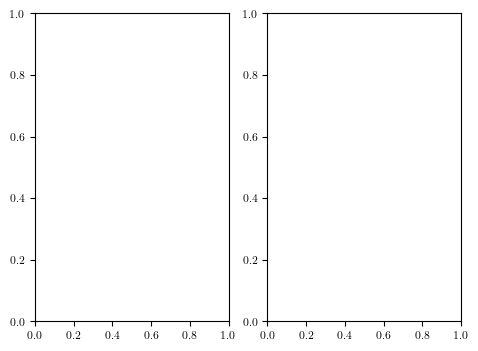

In [18]:
ablation_configs = [
    (['L5H14', 'L12H12', 'L12H17', 'L13H3', 'L13H12', 'L14H9', 'L14H11'], "11223"),
    (['L12H12', 'L12H17', 'L13H3', 'L13H18', 'L13H12', 'L7H19'], "1123344"),
    (['L12H12'], "112"),
    (['L12H12'], "123"),
    (['L12H17'], "11231"),
    (['L12H12', 'L13H3'], "11233"),
    (['L12H12', 'L13H3', 'L12H17'], "11234"),
    (['L12H12'], "1123456"),
    (['L12H12', 'L10H22'], "12223"),
    (['L12H12', 'L12H17'], "12334"),
    (['L12H12', 'L13H18'], "12344")
]

AblationStudy.plot_ablation_effects_grid(ablation_configs[:1], n_cols=2, filename="ablation_effects_grid_11223.pdf")

/home/dcruz/Pivotal/leela-interp/src/leela_interp/core/effect_study.py:1064: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  @staticmethod


112334 L12H12


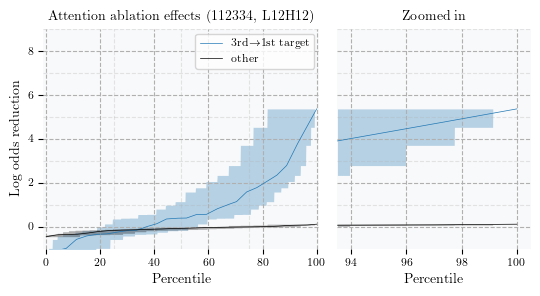

In [18]:
ablation_configs = [
    (['L12H12'], "112334")
]

for cases, puzzle_set in ablation_configs:
    for case in cases:
        ablation_study = AblationStudy(folder_name=case + "_" + puzzle_set)
        print(puzzle_set, case)
        ablation_study.plot_ablation_effects(filename=f"ablation_effects_{case}_{puzzle_set}.pdf", puzzle_set=puzzle_set, LH=case)

In [39]:
list(study.good_results)

['112',
 '111',
 '11234',
 '123',
 '11231',
 '11233',
 '12345',
 '11222',
 '12334',
 '11112',
 '11123',
 '12333',
 '11122',
 '122',
 '11223',
 '12344',
 '1123456',
 '11221',
 '12342',
 '11111',
 '1123344',
 '12223']

0 ['c2a4', 'b4c3', 'a4a2', 'f6f7', 'a2f7'] [0.5920239090919495, 0.451749324798584, 0.8767738342285156, 0.6049863696098328, 0.8772741556167603]
0 ['c2a4', 'b4c3', 'a4a2', 'f6f7', 'a2f7'] [0.039466120302677155, 0.7535219788551331, 0.13934744894504547, 0.057812124490737915, 0.21995295584201813]
1 ['d6g3', 'h2h1', 'g3h4', 'f5h3', 'h4h3'] [0.9384021759033203, 1.0, 0.9300743937492371, 1.0, 0.8777098059654236]
1 ['d6g3', 'h2h1', 'g3h4', 'f5h3', 'h4h3'] [0.02824551984667778, 1.0, 0.6084303259849548, 1.0, 0.9214638471603394]
2 ['g2g4', 'h5h4', 'd6h6', 'f4h5', 'h6h5'] [0.934381902217865, 1.0, 0.9638696908950806, 1.0, 0.9636649489402771]
2 ['g2g4', 'h5h4', 'd6h6', 'f4h5', 'h6h5'] [0.034018658101558685, 1.0, 0.4383273124694824, 1.0, 0.7290634512901306]
3 ['g2g5', 'h4f4', 'g5f5', 'f4f3', 'f5f3'] [0.7100353240966797, 0.3128618001937866, 0.9383967518806458, 0.504242479801178, 0.9710922837257385]
3 ['g2g5', 'h4f4', 'g5f5', 'f4f3', 'f5f3'] [0.03426261618733406, 0.8016296029090881, 0.4578755497932434, 0

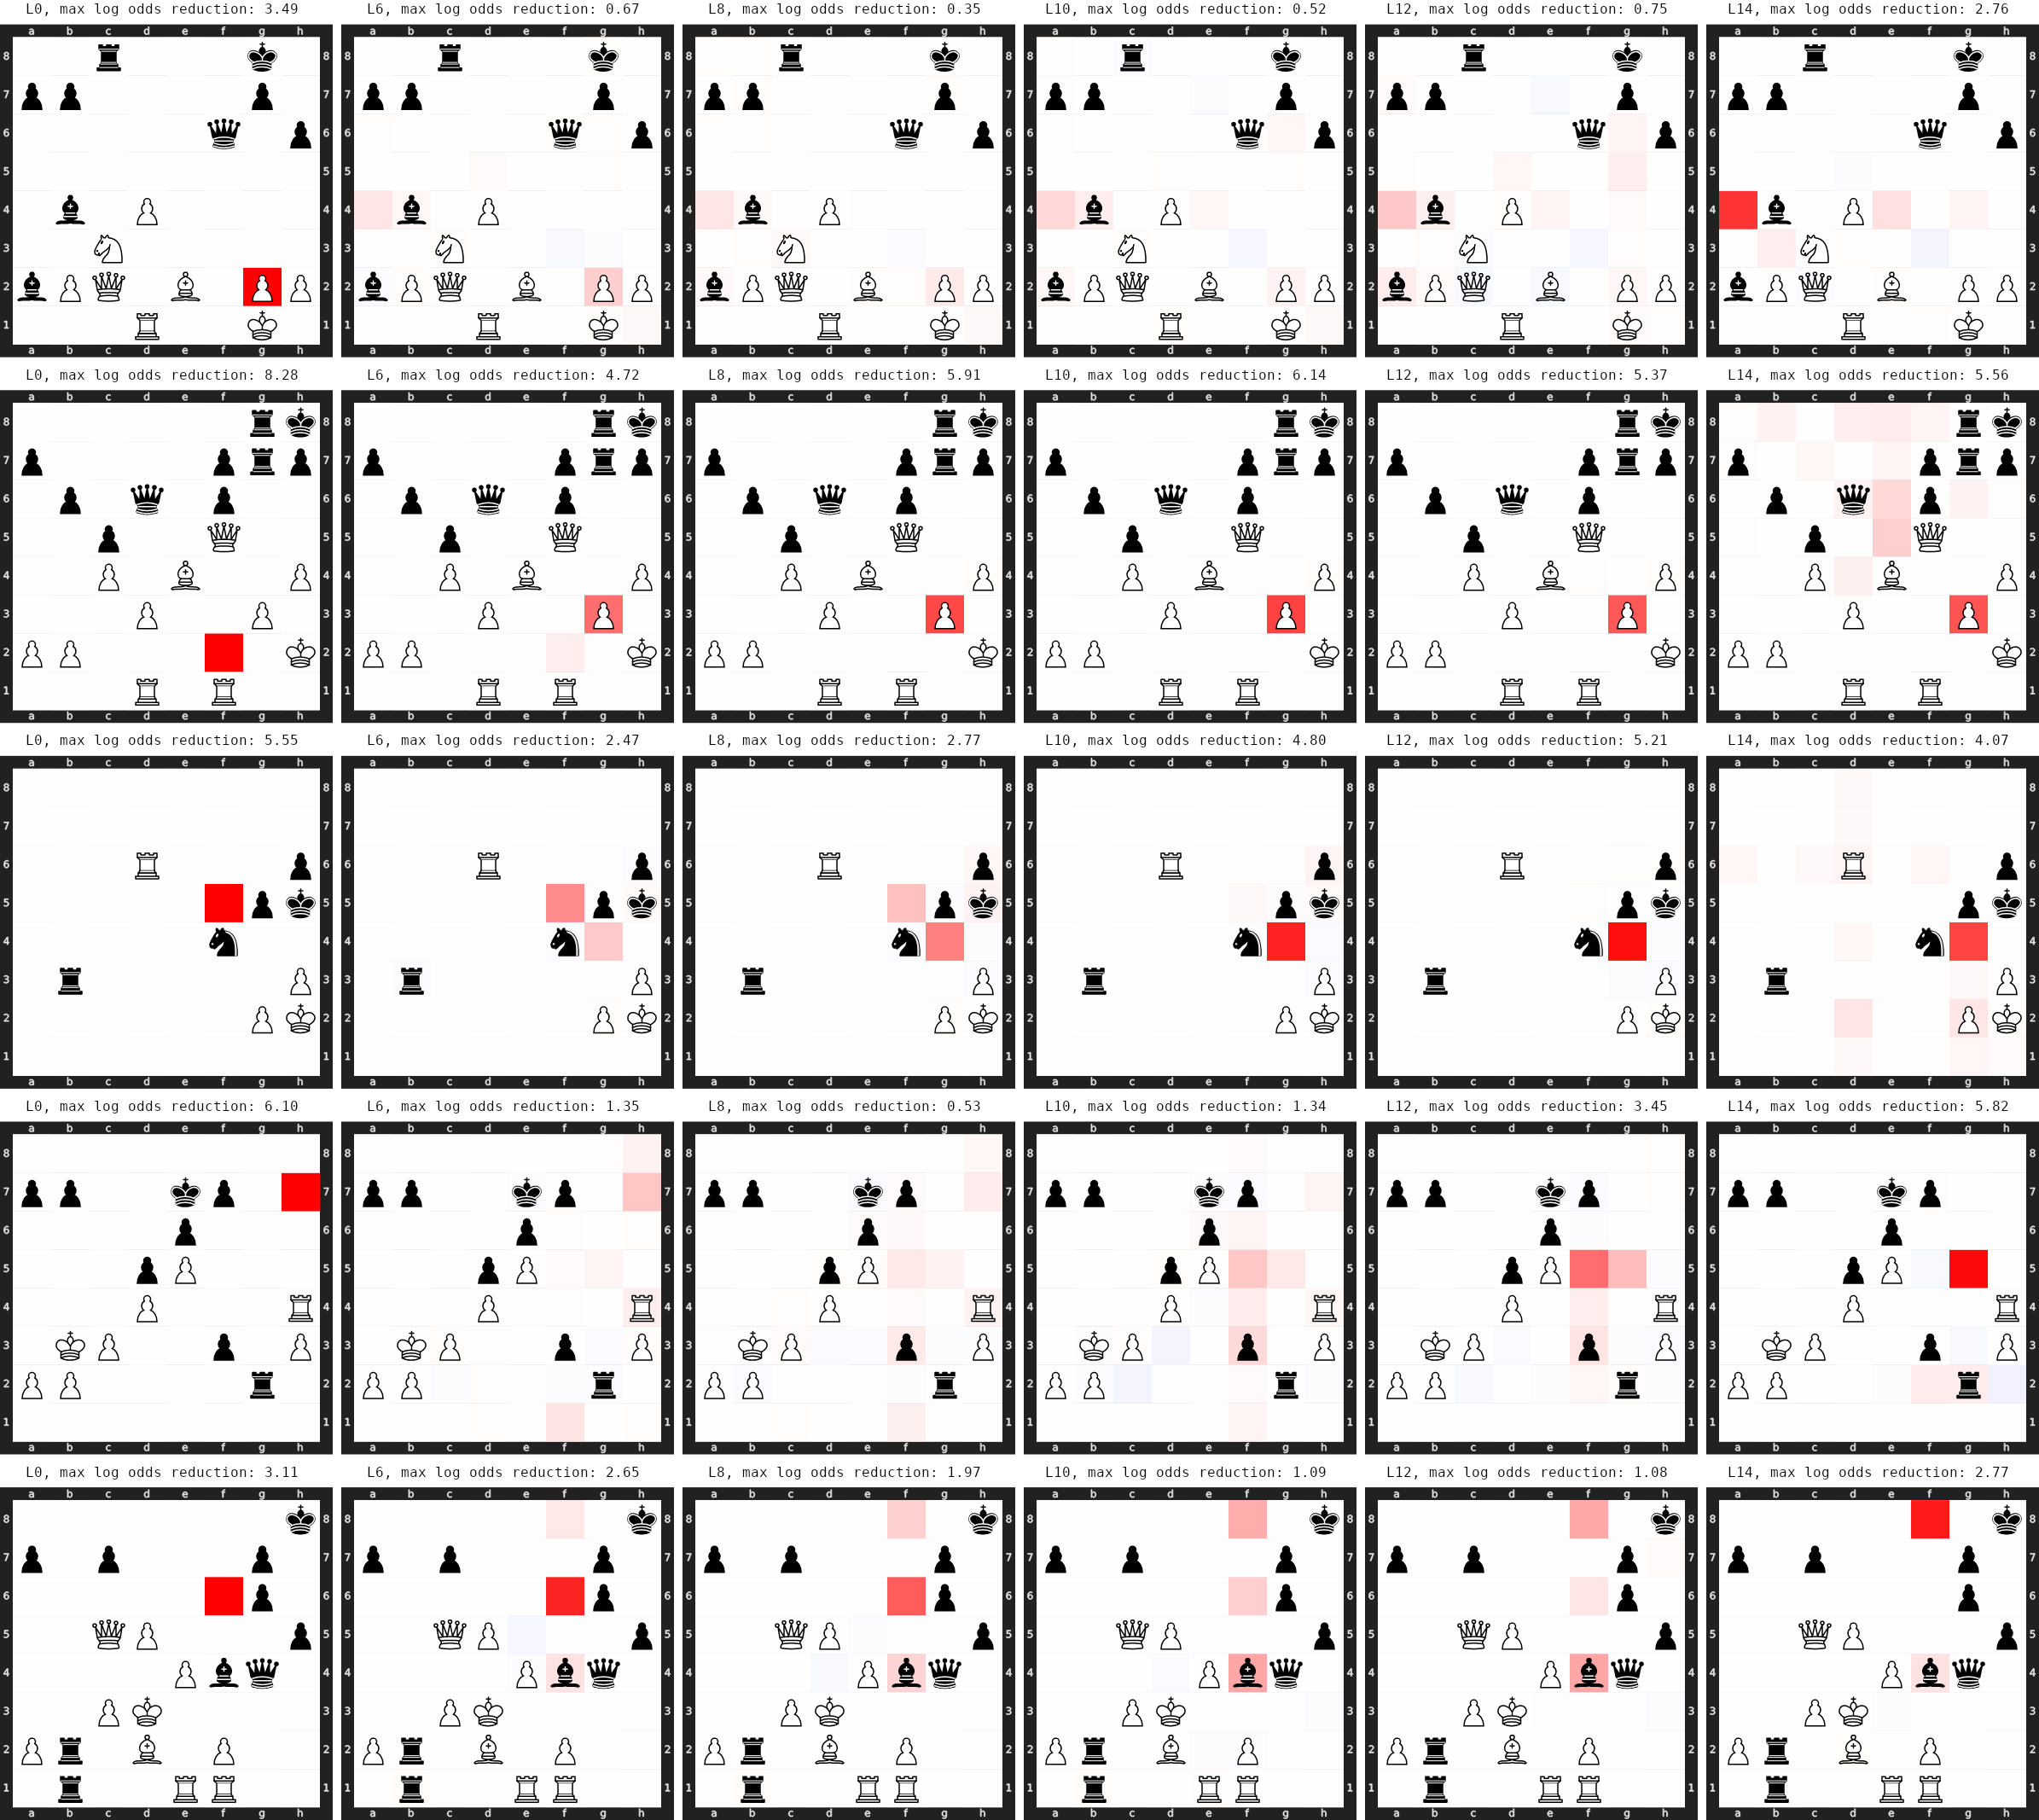

In [40]:
study.plot_examples(mask=study.good_mask[-7])

# Probing

In [ ]:
SETTING_TO_PRETTY_NAME = {
    "main": "Probe on trained model",
    "random_model": "Probe on random model",
}


def plot_probe_results(split="all"):
    fh.set(fast=False)
    plt.figure(figsize=(fh.HALF_WIDTH, 2))

    for i, setting in enumerate(["main", "random_model"]):
        results = np.zeros((15, 5))
        for seed in range(5):
            with open(f"results/probing/{split}/{seed}/{setting}.pkl", "rb") as f:
                new_results = pickle.load(f)
                results[:, seed] = new_results["accuracies"]

        means = results.mean(1)
        squared_seed_errors = results.var(1) / results.shape[1]
        # Size of the eval dataset is 30% of all puzzles
        squared_acc_errors = means * (1 - means) / (0.3 * len(puzzles))
        # 2 sigma errors
        errors = 2 * np.sqrt(squared_seed_errors + squared_acc_errors)

        max_layer = means.argmax()

        print(
            f"Max accuracy ({setting}, L{max_layer}): {means[max_layer]:.2f} +- {errors[max_layer]:.2f}"
        )
        plt.plot(
            means,
            label=SETTING_TO_PRETTY_NAME[setting],
            color=fh.COLORS[i],
            linewidth=fh.LINE_WIDTH,
        )
        plt.fill_between(
            range(15),
            means - errors,
            means + errors,
            color=fh.COLORS[i],
            alpha=fh.ERROR_ALPHA,
            linewidth=0,
        )

    plt.title("Third move prediction")
    plt.xlabel("Layer")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.ylim(0, 1.0)
    plt.xlim(0, 14)
    plt.gca().spines[:].set_visible(False)
    plt.gca().set_facecolor(fh.PLOT_FACE_COLOR)
    plt.grid(linestyle="--")
    plt.grid(which="minor", alpha=0.3, linestyle="--")

In [ ]:
plot_probe_results()
fh.save("figures/probing.pdf")

In [ ]:
plot_probe_results(split="different_targets")
fh.save(different_targets_dir / "probing.pdf")
plot_probe_results(split="same_targets")
fh.save(same_targets_dir / "probing.pdf")

# Piece movement heads

In [107]:
with open("interesting_puzzles.pkl", "rb") as f:
    puzzles = pickle.load(f)
len(puzzles)

22517

In [109]:
knight_heads

[(0, 17),
 (1, 19),
 (3, 14),
 (3, 15),
 (4, 3),
 (5, 3),
 (5, 13),
 (8, 5),
 (9, 5),
 (14, 22),
 (2, 15),
 (6, 0),
 (6, 10),
 (7, 11),
 (8, 19),
 (9, 4),
 (10, 12),
 (10, 22),
 (11, 17),
 (12, 19),
 (12, 22),
 (13, 0)]

In [76]:
len(knight_heads), len(bishop_heads), len(rook_heads)

(22, 27, 29)

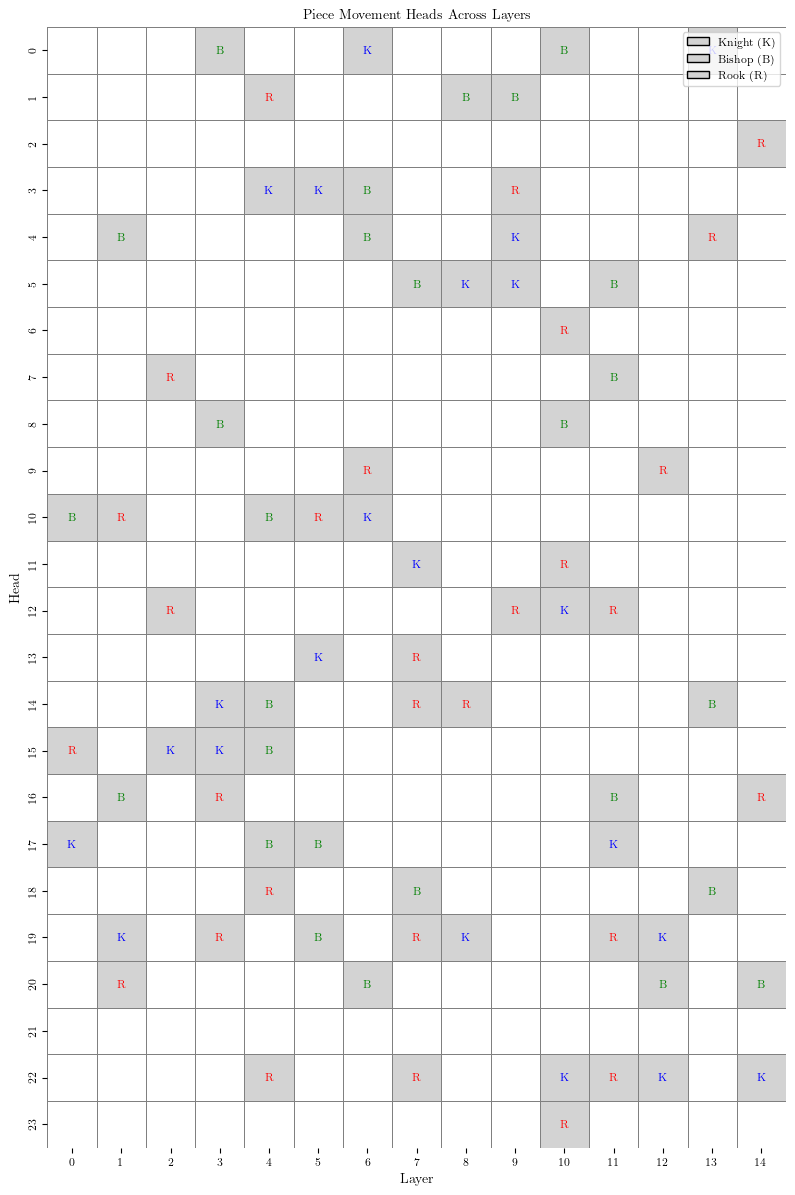

In [77]:
# Create a matrix to hold the data
n_layers = 15
n_heads = 24
data = np.full((n_heads, n_layers), '', dtype=object)

# Fill the matrix with values for each piece type
for layer, head in knight_heads:
    data[head, layer] = 'K'
for layer, head in bishop_heads:
    data[head, layer] = 'B'
for layer, head in rook_heads:
    data[head, layer] = 'R'

# Set up the plot
plt.figure(figsize=(8, 12))

# Create the heatmap
ax = sns.heatmap(data.astype(bool).astype(int), cmap=['white', 'lightgray'], 
                 cbar=False, linewidths=0.5, linecolor='gray')

# Add text annotations
for i in range(n_heads):
    for j in range(n_layers):
        if data[i, j]:
            text_color = 'blue' if data[i, j] == 'K' else 'green' if data[i, j] == 'B' else 'red'
            ax.text(j+0.5, i+0.5, data[i, j], ha='center', va='center', color=text_color, fontweight='bold')

# Customize the plot
plt.title('Piece Movement Heads Across Layers')
plt.xlabel('Layer')
plt.ylabel('Head')

# Create a custom legend
legend_elements = [Patch(facecolor='lightgray', edgecolor='black', label='Knight (K)'),
                   Patch(facecolor='lightgray', edgecolor='black', label='Bishop (B)'),
                   Patch(facecolor='lightgray', edgecolor='black', label='Rook (R)')]
plt.legend(handles=legend_elements, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [110]:
N = 4
patterns = torch.zeros(N, 15, 24, 64, 64, device=device)

boards = [LeelaBoard.from_puzzle(p) for _, p in puzzles.sample(N).iterrows()]

with model.trace(boards):
    for layer in range(15):
        patterns[:, layer] = model.attention_scores(layer).output.save()

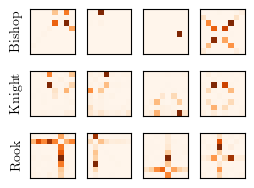

In [111]:
query_indices = random.sample(range(64), N)
plt.figure(figsize=(fh.HALF_WIDTH, 2))
layer = 5

layer_bishop_heads = [head for _layer, head in bishop_heads if _layer == layer]
layer_knight_heads = [head for _layer, head in knight_heads if _layer == layer]
layer_rook_heads = [head for _layer, head in rook_heads if _layer == layer]

if not (layer_bishop_heads and layer_knight_heads and layer_rook_heads):
    raise ValueError("No good heads in this layer, pick a different one")

bishop_head = random.choice(layer_bishop_heads)
knight_head = random.choice(layer_knight_heads)
rook_head = random.choice(layer_rook_heads)

fh.set()

for row, (name, head) in enumerate(
    zip(["Bishop", "Knight", "Rook"], [bishop_head, knight_head, rook_head])
):
    for i in range(N):
        plt.subplot(3, N, row * N + i + 1)
        if i == 0:
            plt.ylabel(
                name,
                rotation=90,
                labelpad=10,
                verticalalignment="center",
            )
        plt.imshow(
            patterns[i, layer, head, query_indices[i], :].cpu().numpy().reshape(8, 8),
            cmap="Oranges",
        )
        plt.xticks([])
        plt.yticks([])
fh.save("figures/piece_movement_patterns.pdf")

In [113]:
save_dir = Path("results/piece_movement_heads")
data = torch.load(save_dir / "effects.pt", map_location=device)
effects = data["effects"]
piece_movement_mask = data["mask"]

/tmp/ipykernel_2770328/120337627.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(save_dir / "effects.pt", map_location=device)


FileNotFoundError: [Errno 2] No such file or directory: 'results/piece_movement_heads/effects.pt'

In [ ]:
def plot_piece_movement_ablation(mask=None):
    if mask is None:
        mask = slice(None)
    else:
        mask = mask[piece_movement_mask]
    data = {}
    colors = {}
    for i, name in enumerate(["Main ablation", "Other piece types", "Random square"]):
        data[name] = effects[("key", name)].squeeze().cpu().numpy()[mask]
        colors[name] = fh.COLORS[i]
    fh.set()
    fh.plot_percentiles(
        data,
        title="Piece movement head ablation",
        colors=colors,
        figsize=(fh.HALF_WIDTH, 2),
        y_lower=-1,
        tick_frequency=25,
        y_ticks=[0, 2, 4, 6, 8],
    )

In [ ]:
plot_piece_movement_ablation()
fh.save("figures/piece_movement_ablation.pdf")

In [ ]:
plot_piece_movement_ablation(mask=different_targets_mask)
fh.save(different_targets_dir / "piece_movement_ablation.pdf")
plot_piece_movement_ablation(mask=same_targets_mask)
fh.save(same_targets_dir / "piece_movement_ablation.pdf")

# Positional encodings
These are the domain-specific positional encodings used by Leela.

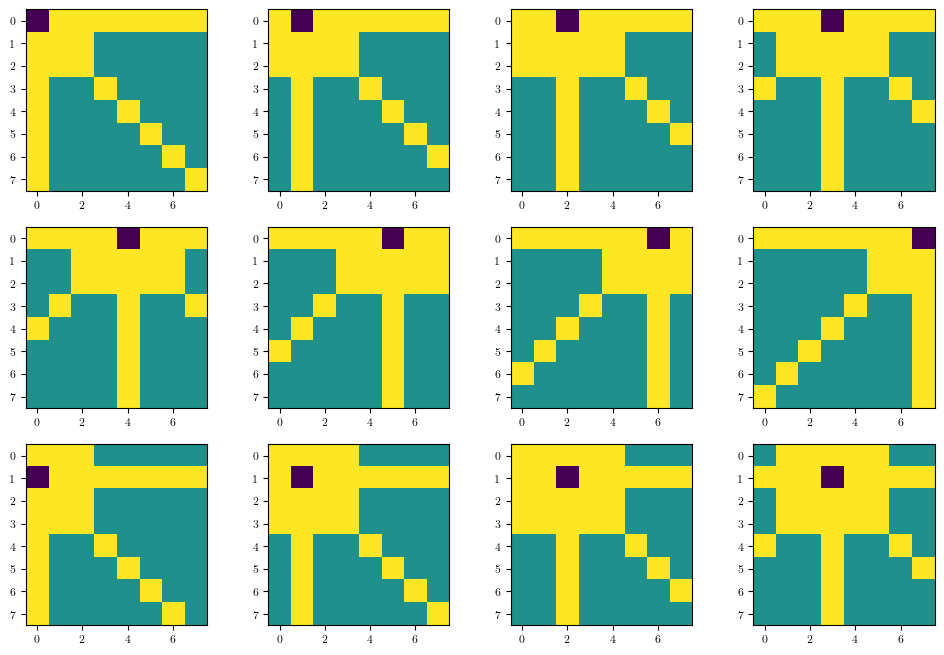

In [47]:
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(
        model._lc0_model.initializers.onnx_initializer_4.cpu()
        .numpy()[0, i]
        .reshape(8, 8)
    )

plt.show()